## ΕΡΓΑΣΙΑ 1  -  ΤΕΧΝΙΚΕΣ ΕΞΟΡΥΞΗΣ ΔΕΔΟΜΕΝΩΝ

**ΜΑΡΑΝΤΙΔΗΣ ΘΕΟΦΑΝΗΣ** - sdi1800106


**ΚΟΥΚΟΥΛΑΡΗΣ ΕΜΜΑΝΟΥΗΛ** - sdi1700262


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Υλοποίηση συναρτήσεων για διευκόλυνση του split στα columns που περιέχουν πολλαπλές τιμές (country,listed_in,cast,director)**

In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re            # for regex
new_df = pd.read_csv('/content/drive/MyDrive/hw1_data/netflix_titles.csv')

sns.set_style("darkgrid")

# check for missing data in row and drop row
new_df = new_df.dropna()

# split country column commas and spaces for unique values
def split_to_country(df2): 
    df = pd.DataFrame()
    df = df2.assign(country=df2['country'].str.replace(", ", ","))
    df = df.assign(country=df['country'].str.split(',')).explode('country')
    df = df[df['country'] != '']
    return df

# split listed_in column commas and spaces for unique values
def split_to_listed_in(df2):
    df = pd.DataFrame()
    df = df2.assign(listed_in=df2['listed_in'].str.replace(", ", ",")) 
    df = df.assign(listed_in=df['listed_in'].str.split(',')).explode('listed_in')
    return df

# split cast column commas and spaces for unique values
def split_to_cast(df2):
    df = pd.DataFrame()
    df = df2.assign(cast=df2['cast'].str.replace(", ", ","))            
    df = df.assign(cast=df['cast'].str.split(',')).explode('cast')
    return df

# split director column commas and spaces for unique values
def split_to_directors(df2):
    df = pd.DataFrame()
    df = df2.assign(director=df2['director'].str.replace(", ", ","))        
    df = df.assign(director=df['director'].str.split(',')).explode('director')
    return df

# split date_added column commas and spaces for unique values
def split_to_date_added(df2):
    df = pd.DataFrame()
    df = df2.assign(date_added=df2['date_added'].str.replace(", ", ","))
    df = df.assign(date_added=df['date_added'].str.split(',')).explode('date_added')
    df = df.assign(date_added=df['date_added'].str.split(' ')).explode('date_added')
    return df
    
    
split_country_df = split_to_country(new_df)
fixed_df = split_to_listed_in(split_country_df)
# choose only Movies
fixed_df[ fixed_df['type'] == 'Movie' ]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,International Movies,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,International Movies,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Netherlands,"October 19, 2020",2005,TV-MA,99 min,Dramas,When Lebanon's Civil War deprives Zozo of his ...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Netherlands,"October 19, 2020",2005,TV-MA,99 min,International Movies,When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


## Question 1: ***Which type of show has the most occurences***

Δημιουργούμε ένα νέο Dataframe και μετράμε τις φορές που εμφανίζεται ο κάθε τύπος (ταινία ή show).Τέλος κάνουμε ένα γράφημα και παρουσιάζουμε τα αποτελέσματα.

In [4]:
# we count the times each type appears 
type_count = new_df['type'].value_counts()
print(type_count)
new_df.head(10)

Movie      4673
TV Show     135
Name: type, dtype: int64


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...


In [5]:
# create a df and select 'type' column and 'show_id' column
shows_per_type = pd.DataFrame()
shows_per_type['type'] = new_df['type'].values
shows_per_type['count'] = new_df['show_id'].values


      type  count
0    Movie   4673
1  TV Show    135

Netflix has more Movie type 



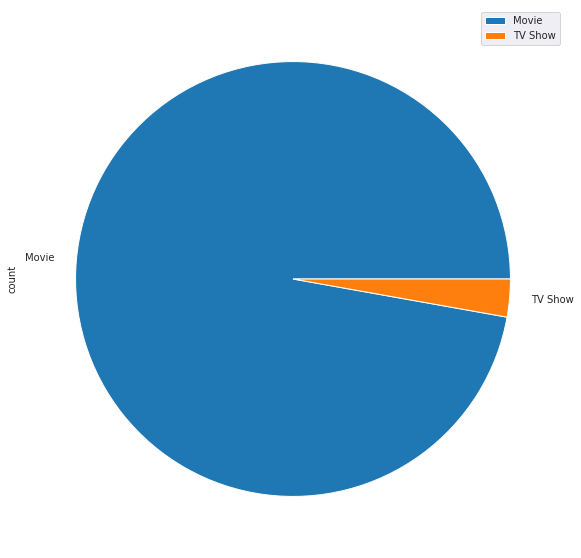

In [6]:
# we group the new created df based on 'type' column and count the number of times a 'type' appears

s = shows_per_type.groupby(['type']).count()
s.sort_values(['count'], ascending=False)

# we make a pie chart for visual representation
s.plot(kind='pie',subplots=True,figsize=(15,10))

# reset index for nice print 
s.reset_index(inplace = True)
print(s)

# we take the max of the above result and print it 
answer = s['type'][s['count'] == s['count'].max()].to_string(index=False)
print("\nNetflix has more" + answer + " type "+"\n") 

## Question 2 : ***Which is the type of show, netflix invests more, the last couple of year?***

Αφού κάνουμε split ως προς το column του date κρατάμε όλα τα rows που περιέχουν τον χρόνο και μετράμε το πλήθος των φορών που εμφανίζεται ένα year τόσο για το type του Movie όσο και για το type του TV Show.Στην συνέχεια παρουσιάζουμε ένα γράφημα για κάθε type με τις τελευταιές 5 χρονιές.

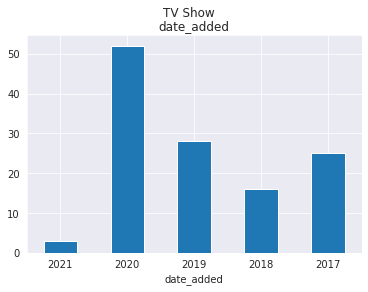

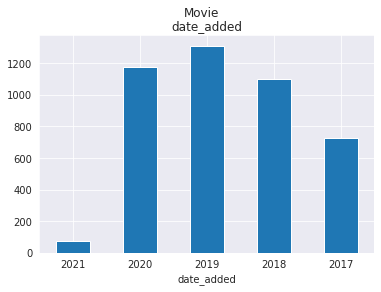

In [7]:
# we make a df with type , date_added , show_id
shows_per_type = pd.DataFrame()
shows_per_type['type'] = new_df['type'].values
shows_per_type['date_added'] = new_df['date_added'].values
shows_per_type['show_id'] = new_df['show_id'].values


# we split the date_added column commas and spaces
shows_per_type = shows_per_type.assign(date_added=shows_per_type['date_added'].str.split(',')).explode('date_added')
shows_per_type = shows_per_type.assign(date_added=shows_per_type['date_added'].str.split(' ')).explode('date_added')
s = shows_per_type

# we keep every row which contains the year of each movie
s = s.loc[ (s['date_added'].str.len() == 4) & (s['date_added'].str.contains('0|1|2|3|4|5|6|7|8|9', flags=re.I, regex=True)) ]

s.groupby('type')['date_added'].value_counts()
# we make date_added column as int in order to sort by column later
s['date_added'].astype(int)
# we group movies by type and count movies for every year
use = s.groupby('type')['date_added'].value_counts().sort_index(ascending = False)
# we print the top 5 years for each type and the number of movies or shows that have been added in this year
use['TV Show'].head(5).plot.bar(rot=0, subplots=True, title='TV Show')
plt.show()
use['Movie'].head(5).plot.bar(rot=0, subplots=True, title='Movie')
plt.show()


## Question 3 : ***Which country has the most content***

'Οπως και παραπάνω δημιουργούμε ενα dataframe με split ως προς τις χώρες και μετράμε πόσες φορές εμφανίζεται η κάθε χώρα είτε σε ενα Movie είτε σε ένα TV Show και τυπώνουμε το Dataframe σε φθίνουσα σειρά.

In [8]:


shows_per_country = pd.DataFrame()
shows_per_country['country'] = new_df['country'].values
shows_per_country['count'] = 1

# split countries by comma 
shows_per_country = shows_per_country.assign(country=shows_per_country['country'].str.split(',')).explode('country')

# we group results by countries and we count how many times a country appears
s = shows_per_country.groupby(['country']).count()


final = s.sort_values(['count'], ascending=False)
final

,count
country,
United States,1883
India,864
United Kingdom,311
United States,298
Canada,155
...,...
Nicaragua,1
Paraguay,1
Malawi,1


### Question 4 : ***What type of content is the most dominant for each country?***

Κάνουμε πάλι split ως προς το column country και listed_in 
και για κάθε χώρα μετράμε πόσες φορές εμφανίζεται ενα genre.
Στην συνέχεια τυπώνουμε ενδεικτικά ένα μέρος του dataframe που φτιάχνουμε.

In [9]:
# 4
# first we split countries 
split_country_df = split_to_country(new_df)
# then we split to listed in 
fixed_df = split_to_listed_in(split_country_df)
#fixed_df = fixed_df[fixed_df['country'] != '']

# we create a df with countries and genres 
genre_per_country = pd.DataFrame()
genre_per_country['country'] = fixed_df['country'].values
genre_per_country['genre'] = fixed_df['listed_in'].values

# we group by country and count the number a genre appears for a country
s = genre_per_country.groupby(['country'])['genre'].value_counts()
# print the top 15
print(s.head(32))



country      genre                    
Afghanistan  Documentaries                 1
             International Movies          1
Albania      Dramas                        1
             International Movies          1
Algeria      Dramas                        2
             International Movies          2
             Classic Movies                1
Angola       Action & Adventure            1
             International Movies          1
Argentina    International Movies         45
             Dramas                       31
             Comedies                     13
             Stand-Up Comedy               7
             Independent Movies            6
             Thrillers                     6
             Music & Musicals              4
             Action & Adventure            3
             Children & Family Movies      3
             Documentaries                 3
             Horror Movies                 3
             Romantic Movies               3
             Spo

### Question 5 : ***Present the actors with the most amount of shows they have participated in, for each country***

Αφού κάνουμε τα κατάλληλα split, ομαδοποιούμε τα αποτελέσματα βάση του column των χωρών και κρατάμε όλους τους ηθοποιούς που εμφανίζονται σε κάθε χώρα.
Στην συνέχεια μετράμε και τυπώνουμε για κάθε country τους top 3 actors σε κάθε χώρα.
Γίνεται και η αντίστοιχη γραφική αναπαράσταση.

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


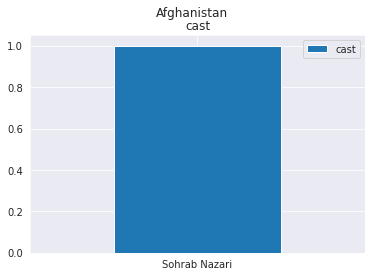

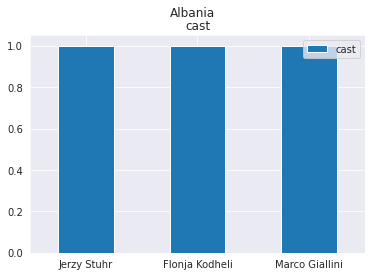

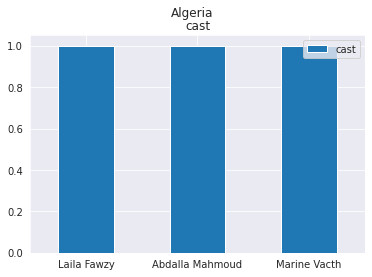

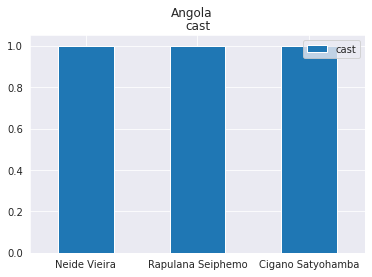

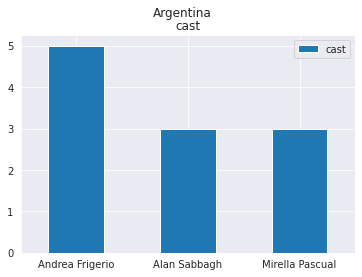

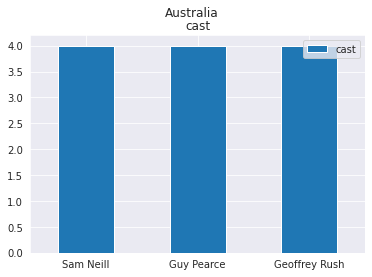

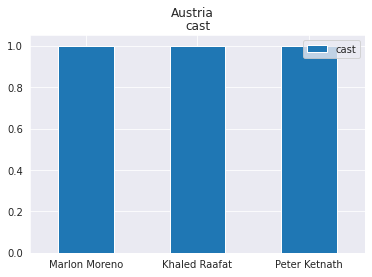

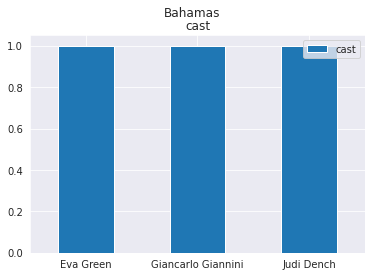

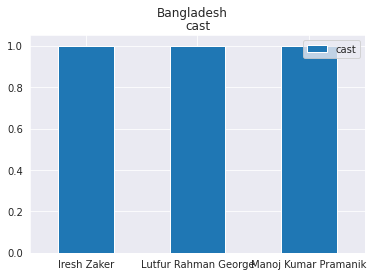

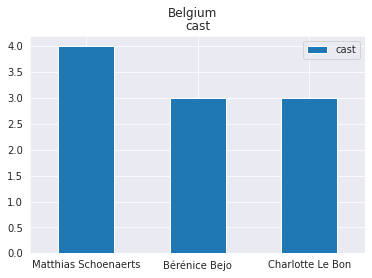

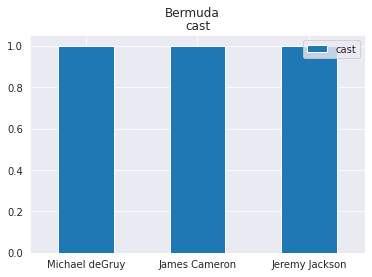

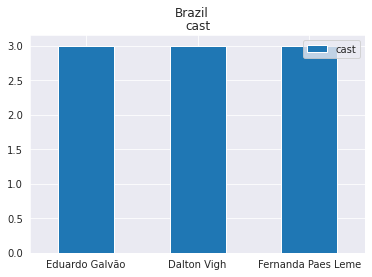

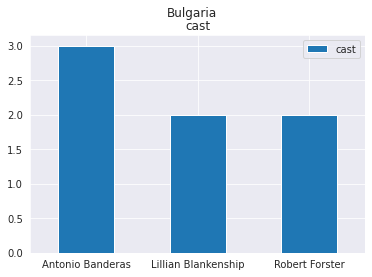

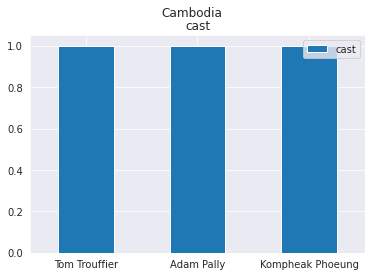

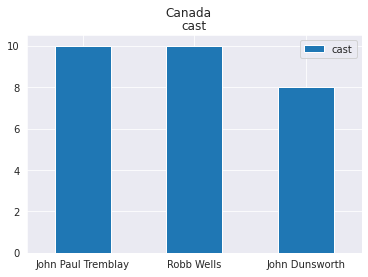

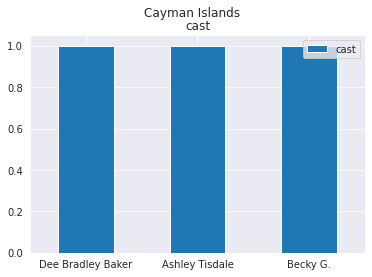

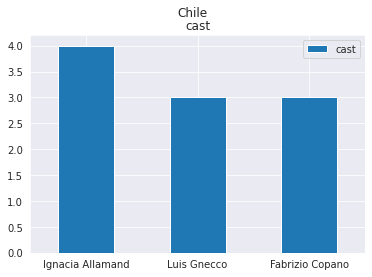

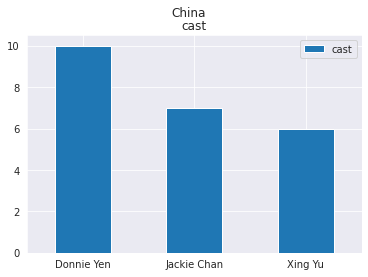

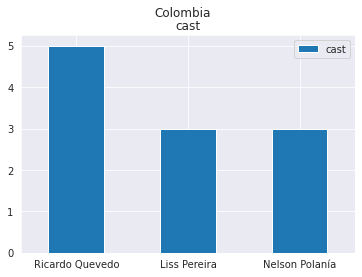

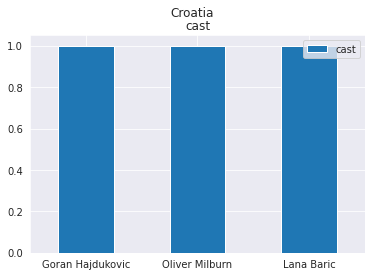

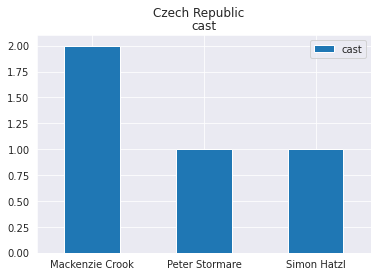

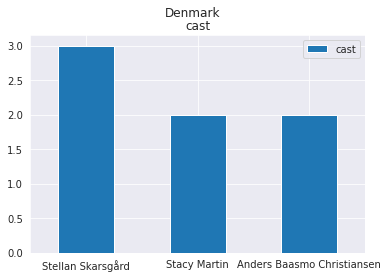

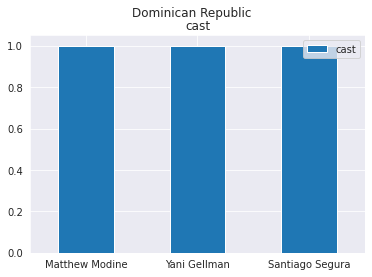

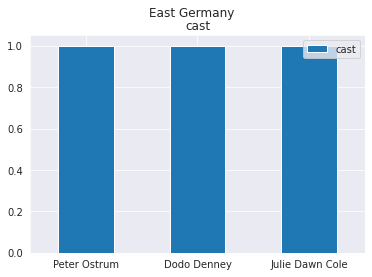

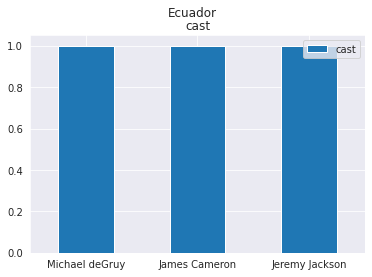

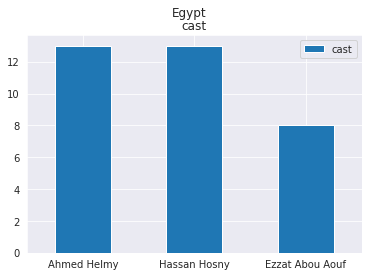

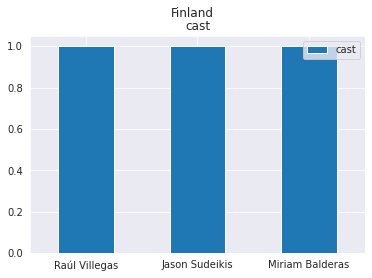

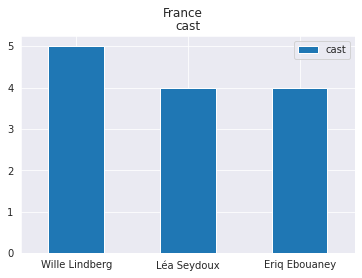

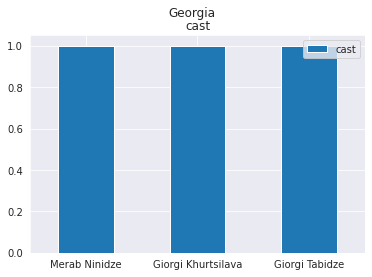

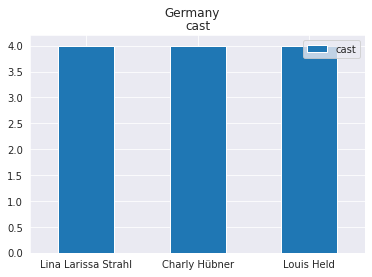

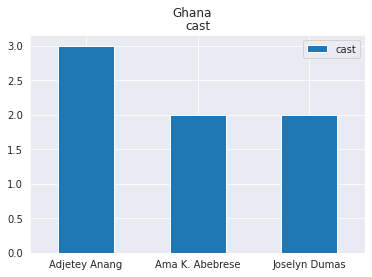

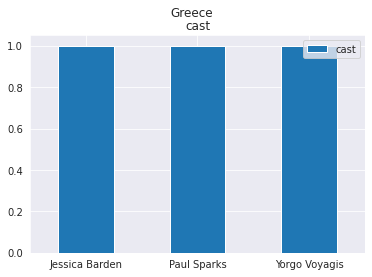

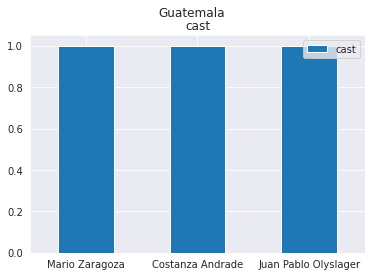

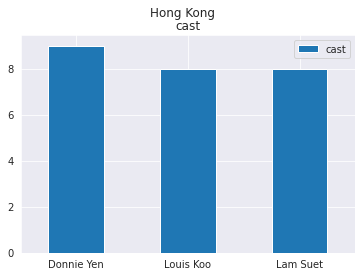

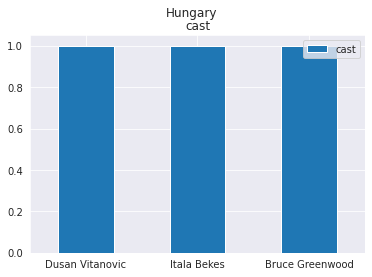

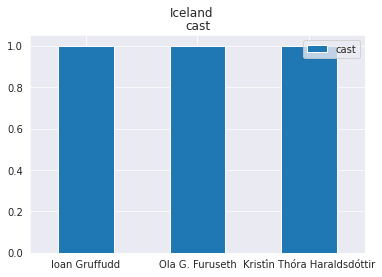

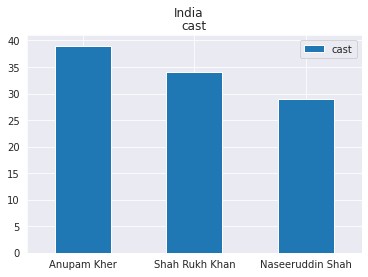

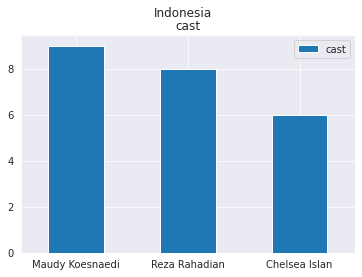

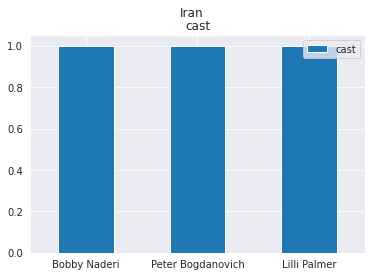

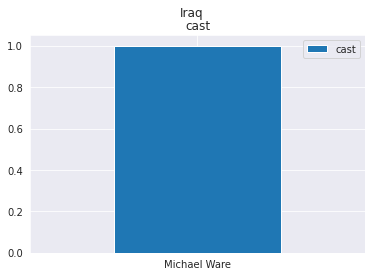

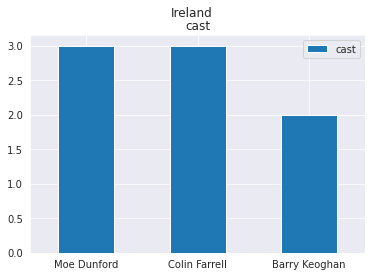

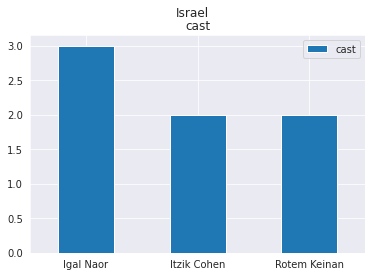

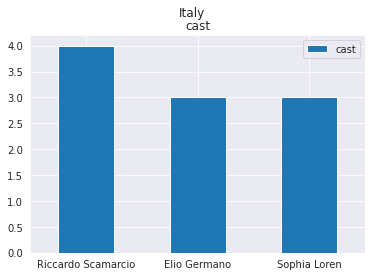

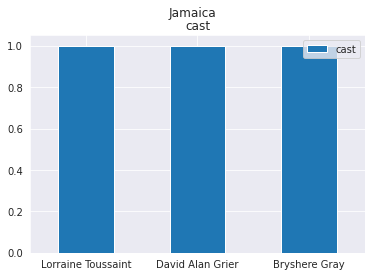

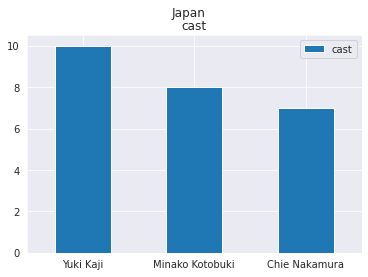

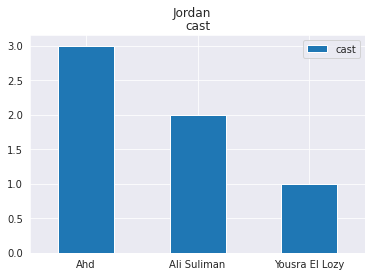

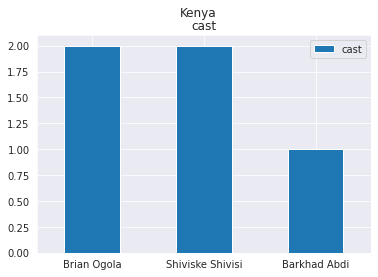

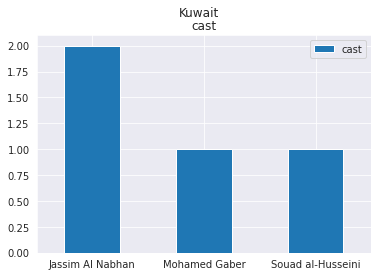

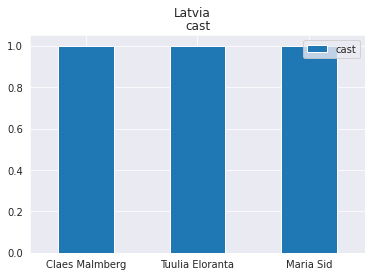

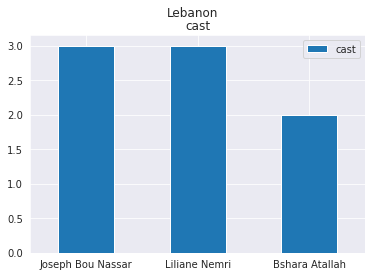

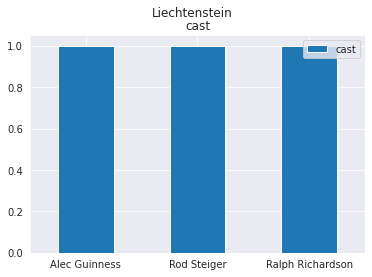

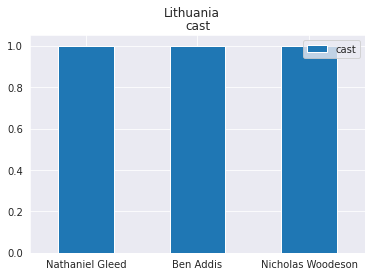

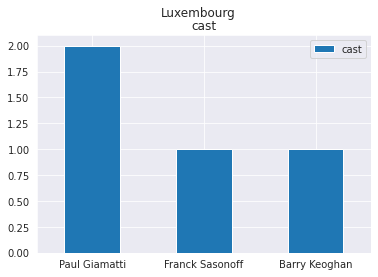

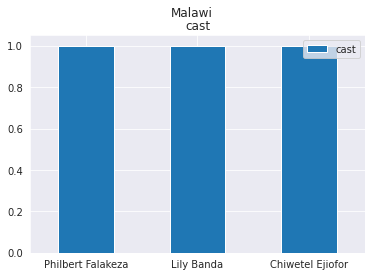

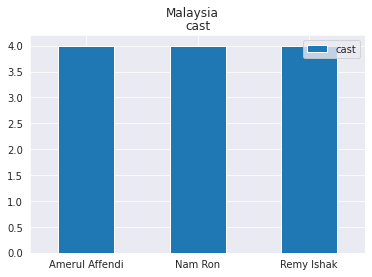

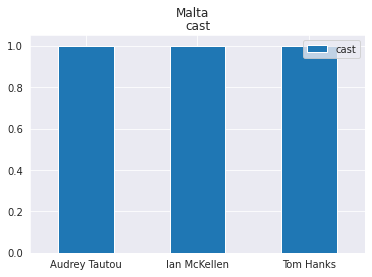

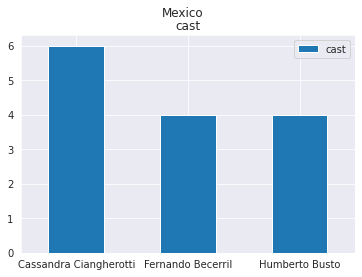

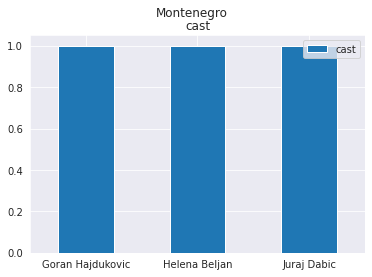

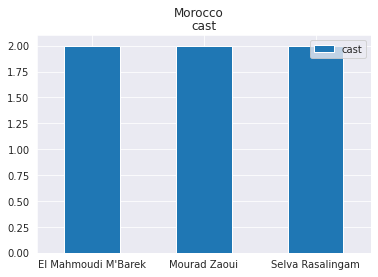

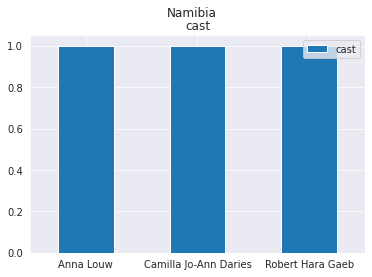

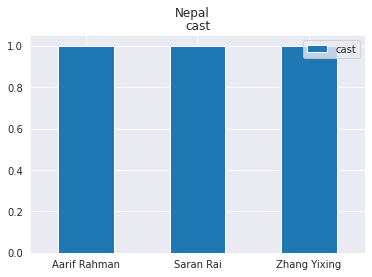

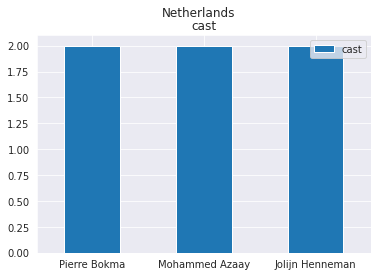

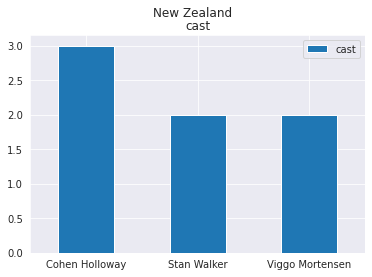

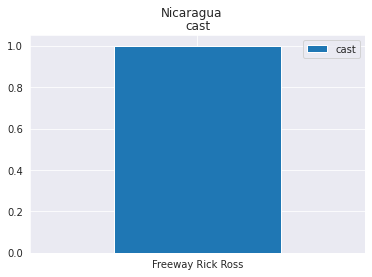

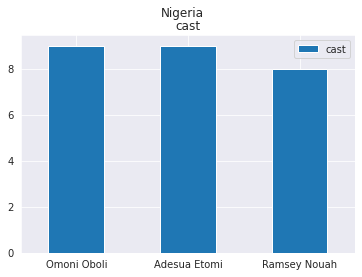

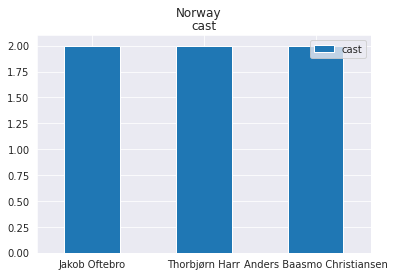

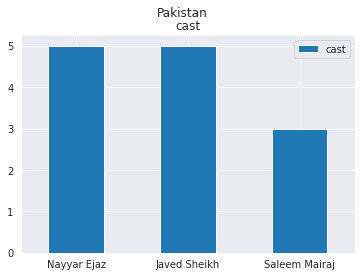

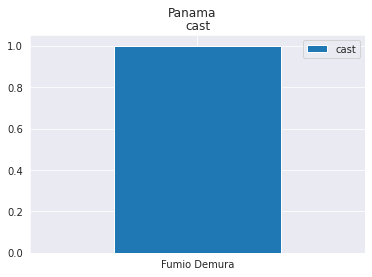

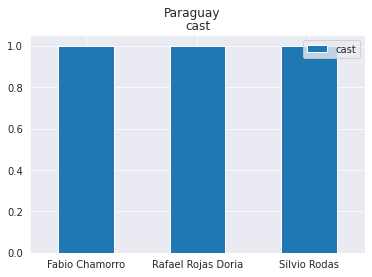

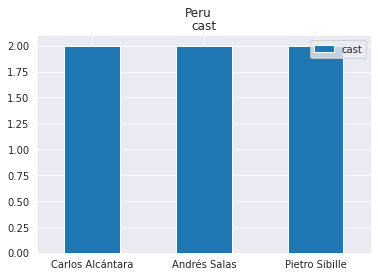

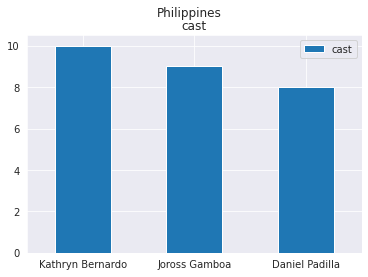

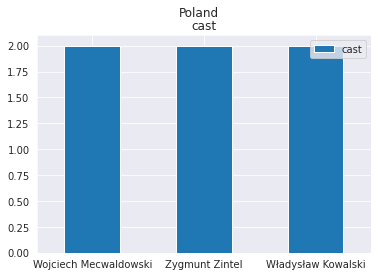

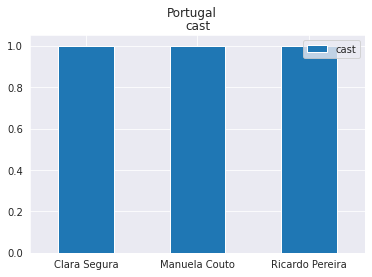

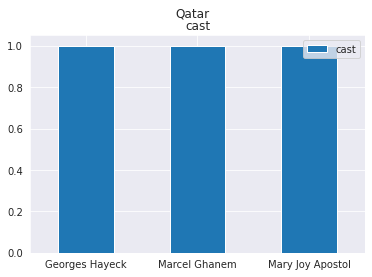

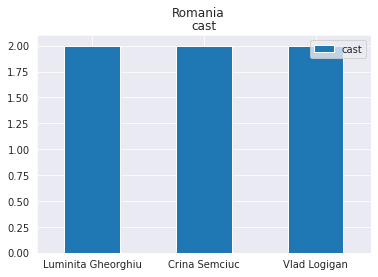

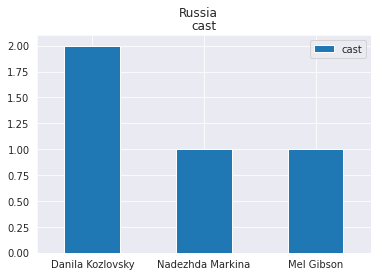

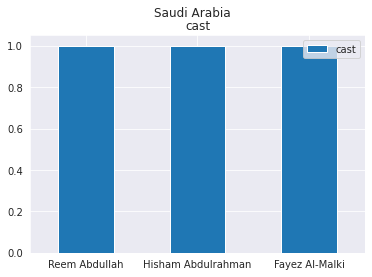

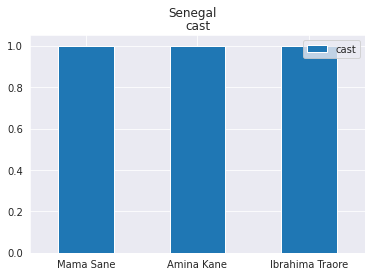

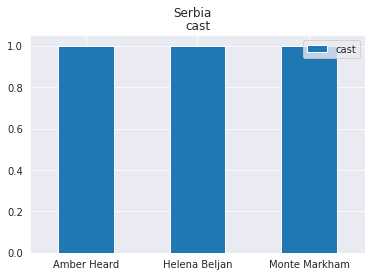

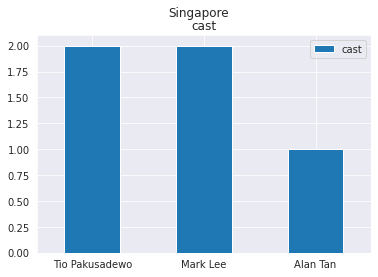

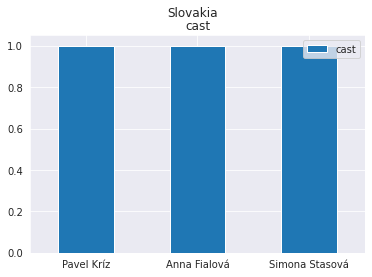

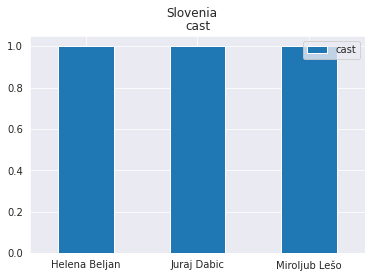

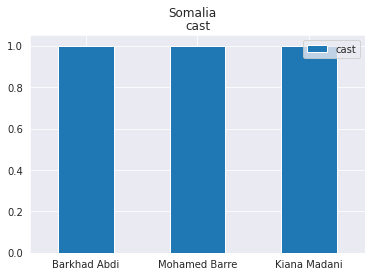

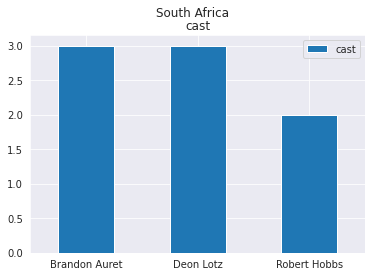

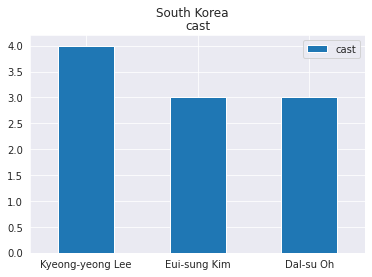

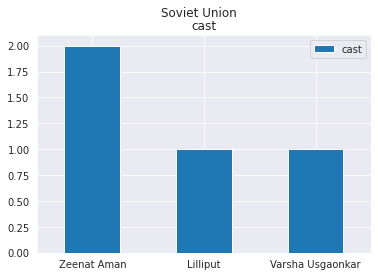

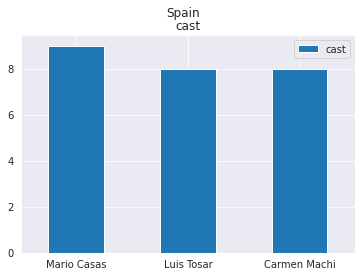

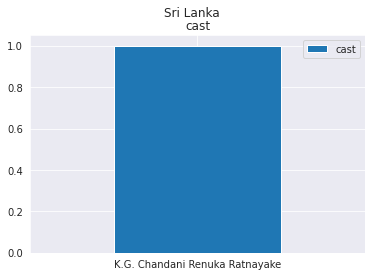

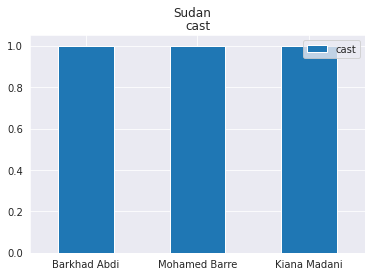

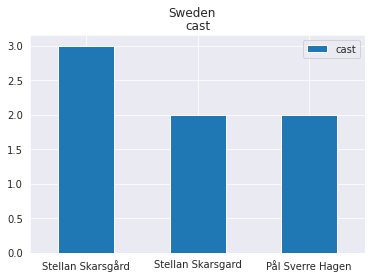

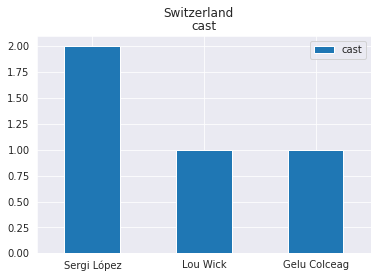

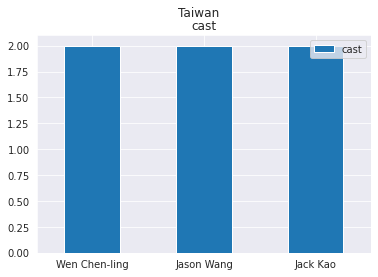

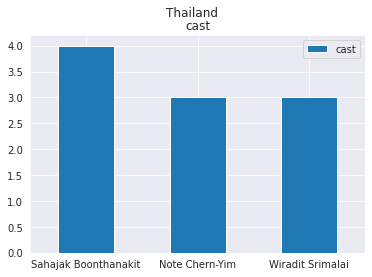

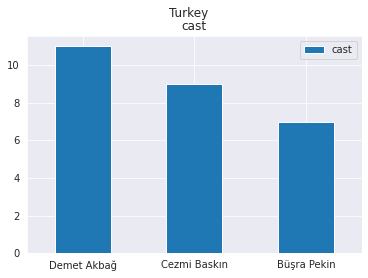

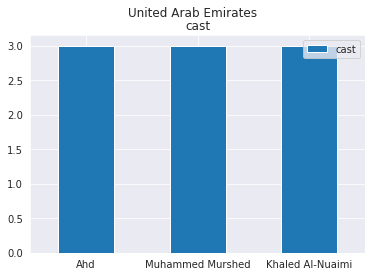

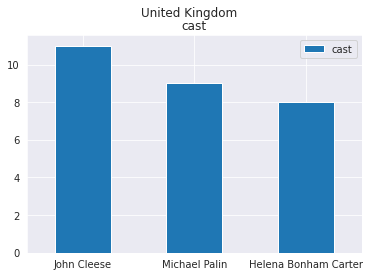

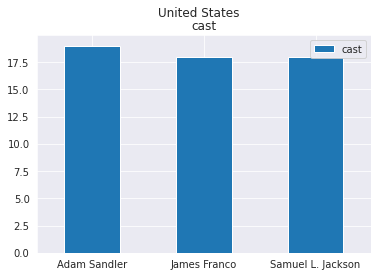

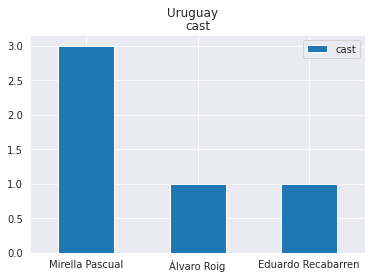

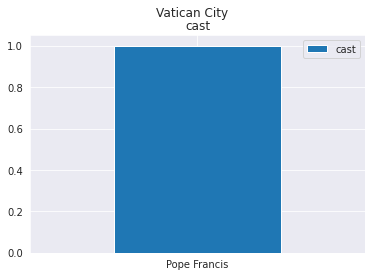

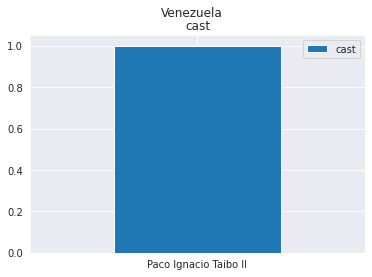

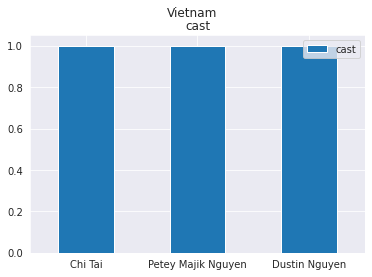

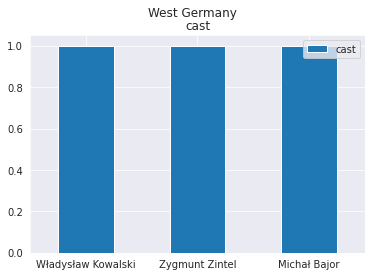

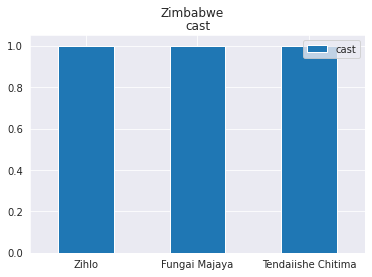

In [10]:

# first we split countries 
split_country_df = split_to_country(new_df)

# then we split to cast 
fixed_df = split_to_cast(split_country_df)


# now we have to filter only movies and group the cast based on countries 
fix = fixed_df.loc[ fixed_df['type'] == "Movie" ]

# we make a new df from the filtered df created above 
cropped = pd.DataFrame()
cropped['cast'] = fix['cast']
cropped['country'] = fix['country']

# we group each country by cast
cropped = cropped.groupby('country')['cast']

# we make a new df with the top 3 actors of each country and we plot it
for country, group in cropped:
    country_acts = pd.DataFrame(group.value_counts())
    
    top_country_acts = country_acts.head(3)

    top_country_acts.plot.bar(rot=0, subplots=True, title=country)
    

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3657 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 3657 missi

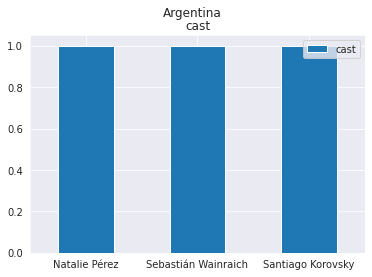

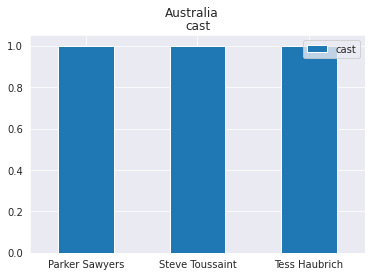

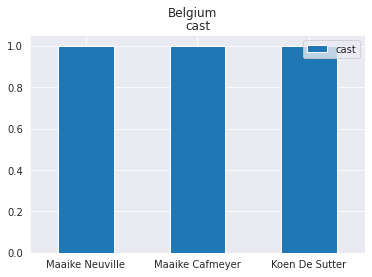

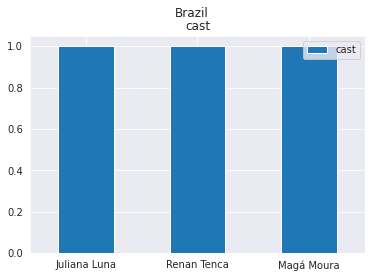

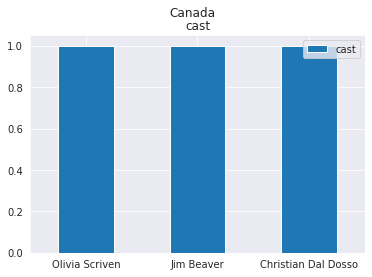

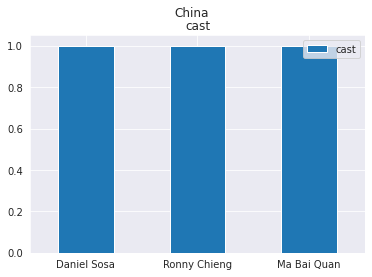

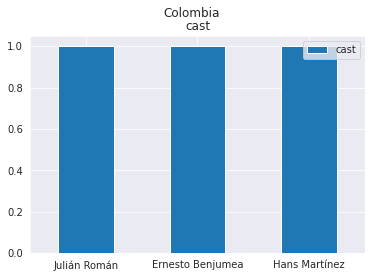

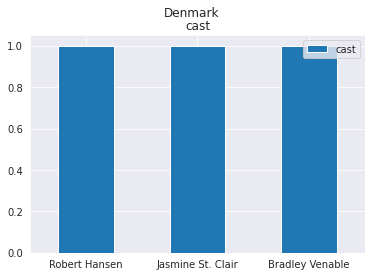

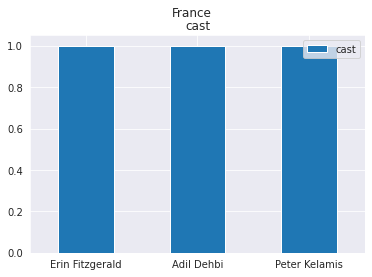

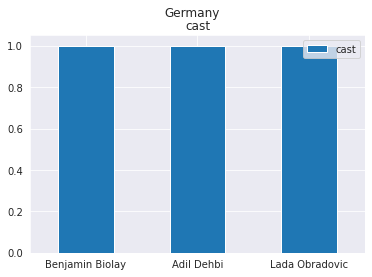

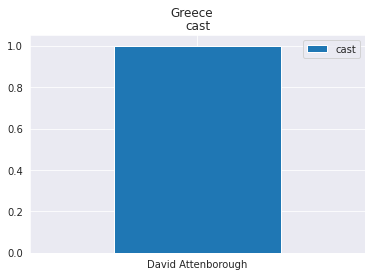

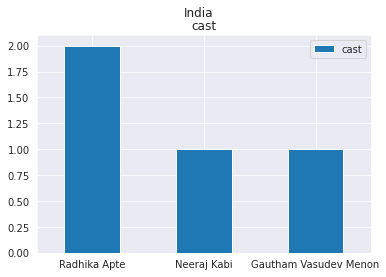

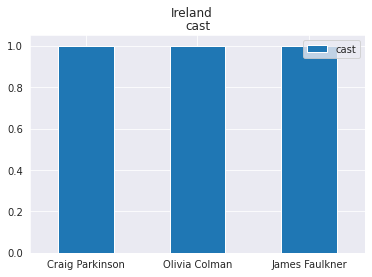

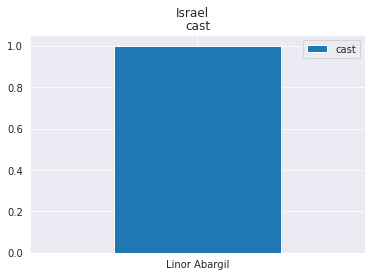

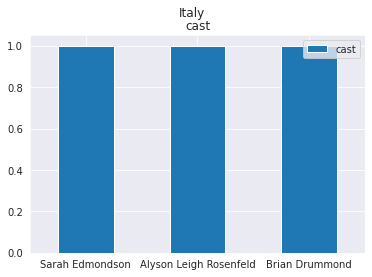

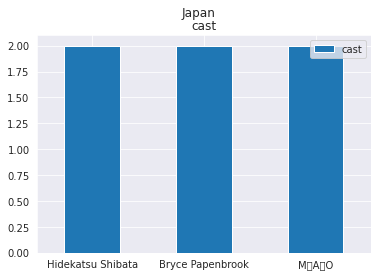

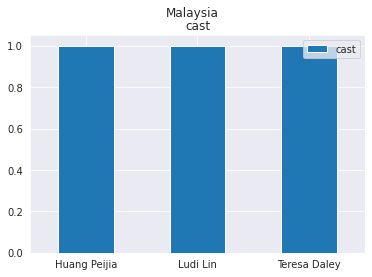

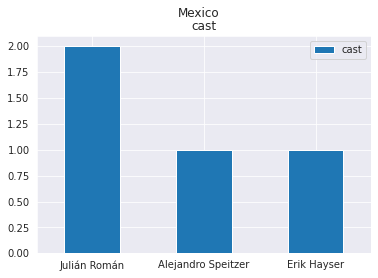

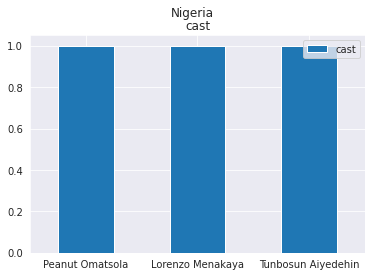

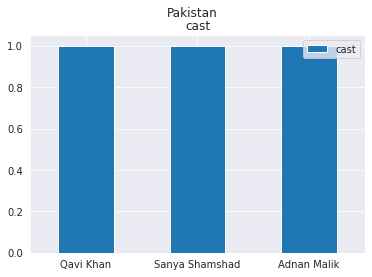

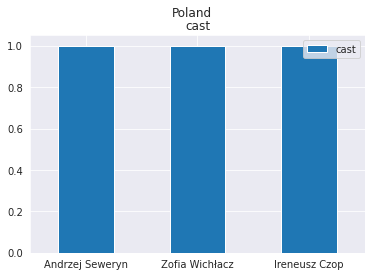

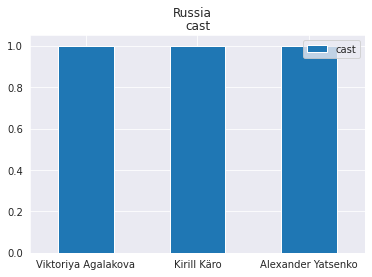

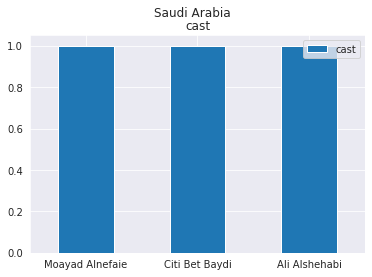

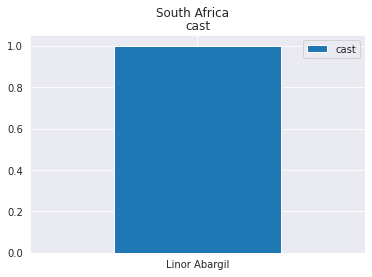

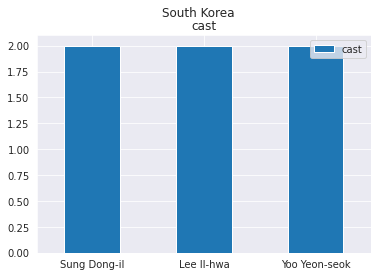

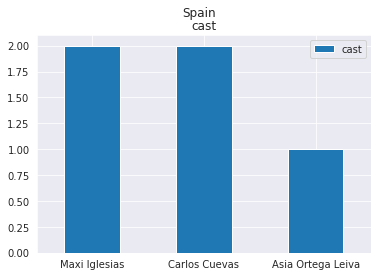

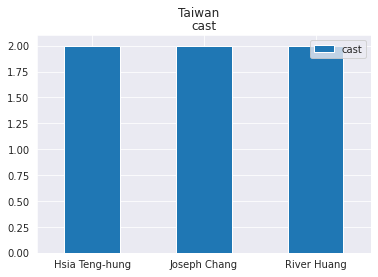

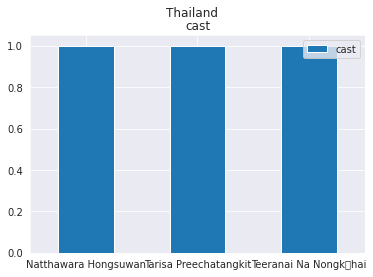

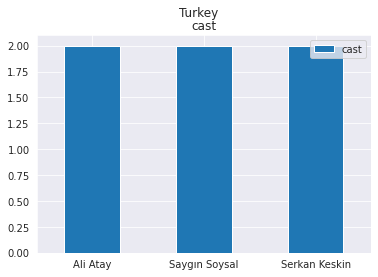

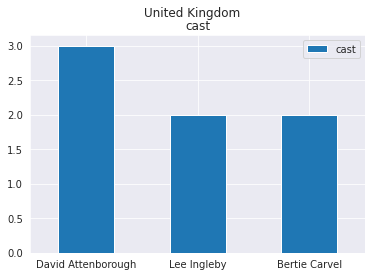

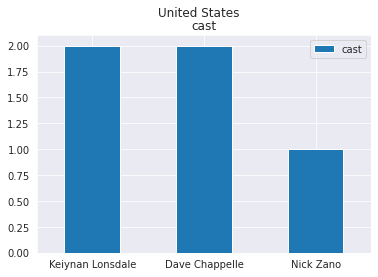

In [11]:
# we do the same as before for the TV Shows 

fix = fixed_df.loc[ fixed_df['type'] == "TV Show" ]

cropped = pd.DataFrame()
cropped['cast'] = fix['cast']
cropped['country'] = fix['country']

cropped = cropped.groupby('country')['cast']  #.value_counts()#['cast'].value_counts()#.loc[lambda x : x>1]



for country, group in cropped:
    country_acts = pd.DataFrame(group.value_counts())
    
    top_country_acts = country_acts.head(3)

    top_country_acts.plot.bar(rot=0, subplots=True, title=country)

### Question 6 : ***Present the amount of movies per age group it is intended to be watched by. Do the same for TV Shows***

Δημιουργούμε ένα dictionary με keys τις 4 ηλικιακές κατηγορίες και αρχικοποιούμε τα values με 0.
Στην συνέχεια ανάλογα με την τιμή που έχει η κάθε ταινία στην στήλη rating 
αυξάνουμε το value του κατάλληλου key του dictionary μας.
Τέλος δημιουργούμε ένα Dataframe από το dictionary μας και κάνουμε την γραφική μας αναπαράσταση.

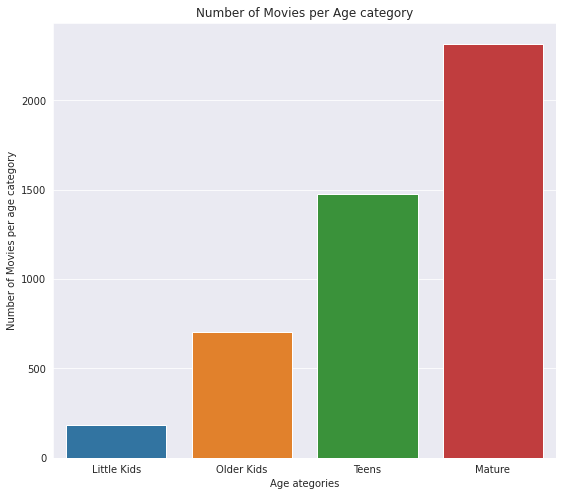

In [12]:
# we make a dict in order to store the age ranking
categories_mov = dict()

# we make a new df selecting only movies
dff = pd.DataFrame(new_df)
dff_mov = dff[ dff['type'] == "Movie" ] # get Movies only

# we initialize each dict key with 0 value 
categories_mov['Little Kids'] = categories_mov['Older Kids'] = categories_mov['Teens'] = categories_mov['Mature'] = 0

# for each row in the df created we increase the suitable key in dict based on the ratings given
for index, row in dff_mov.iterrows():
    if row['rating'] == "G" or row['rating'] == "TV-Y" or row['rating'] == "TV-G":
        categories_mov['Little Kids'] += 1
    elif row['rating'] == "PG" or row['rating'] == "TV-Y7" or row['rating'] == "TV-Y7-FV" or row['rating'] == "TV-PG":
        categories_mov['Older Kids'] += 1
    elif row['rating'] == "PG-13" or row['rating'] == "TV-14":
        categories_mov['Teens'] += 1
    else:
        categories_mov['Mature'] += 1

# we plot the dict created 
df = pd.DataFrame(categories_mov, index = ['Number of Movies'])
fig = sns.barplot(data = df)
fig = fig.set(xlabel='Age ategories', ylabel='Number of Movies per age category', title='Number of Movies per Age category')
fig = plt.gcf()
fig.set_size_inches(9, 8)
plt.show(fig)

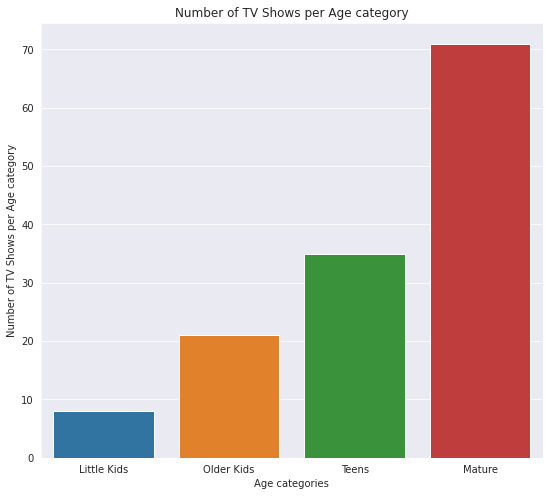

In [13]:
# we make the same as before for the TV Shows

categories_tv = dict()
dff = pd.DataFrame(new_df)
dff_tv = dff[ dff['type'] == "TV Show" ] 

categories_tv['Little Kids'] = categories_tv['Older Kids'] = categories_tv['Teens'] = categories_tv['Mature'] = 0

    
for index, row in dff_tv.iterrows():
    if row['rating'] == "G" or row['rating'] == "TV-Y" or row['rating'] == "TV-G":
        categories_tv['Little Kids'] += 1
    elif row['rating'] == "PG" or row['rating'] == "TV-Y7" or row['rating'] == "TV-Y7-FV" or row['rating'] == "TV-PG":
        categories_tv['Older Kids'] += 1
    elif row['rating'] == "PG-13" or row['rating'] == "TV-14":
        categories_tv['Teens'] += 1
    else:
        categories_tv['Mature'] += 1

df = pd.DataFrame(categories_tv, index = ['Number of TV Shows'])
fig = sns.barplot(data = df)
fig = fig.set(xlabel='Age categories', ylabel='Number of TV Shows per Age category', title='Number of TV Shows per Age category')
#plt.show(fig)
fig = plt.gcf()
fig.set_size_inches(9, 8)
plt.show(fig)

### Question 7 : ***Present a graph, with  the volume of content added per month. Which is the optimal time to release a new show?***

Στο τρέχον ερώτημα κάνουμε split το dataframe με βάση το 'date_added'
και επιλέγουμε όλα τα rows που περιέχουν τους μήνες.
Στην συνέχεια κάνουμε group ως προς το 'date_added' και μετράμε το πλήθος των 
φορών που εμφανίζεται ένας μήνας.
Τέλος τυπώνουμε το dataframe που δημιουργήσαμε σε φθίνουσα σειρά.

In [14]:

df = split_to_date_added(new_df) # split and explode the date_added into Day-Month-Year
# we only keep rows with months 
df = df[df['date_added'].str.contains('January|February|March|April|May|June|July|August|September|October|November|December', flags=re.I, regex=True)]
shows_per_month = pd.DataFrame()

# we create a df from the above filtered df
shows_per_month['month'] = df['date_added'].values
shows_per_month['n_shows'] = df['show_id'].values

# we group the new df by month and count how many times a month appears
# we finally print the results in descending order
s = shows_per_month.groupby(['month']).count()
shows_per_month_gp = pd.DataFrame(s)
shows_per_month_gp = shows_per_month_gp.reset_index()
shows_per_month_gp.sort_values(by=['n_shows'],ascending=False)




,month,n_shows
10,October,498
4,January,497
2,December,495
9,November,470
7,March,425
5,July,371
0,April,370
1,August,369
11,September,355
6,June,334


## **The month with the least number of shows happens to be February**

In [15]:
shows_per_month_gp.sort_values(by='n_shows', ascending=True).head(1)

,month,n_shows
3,February,296


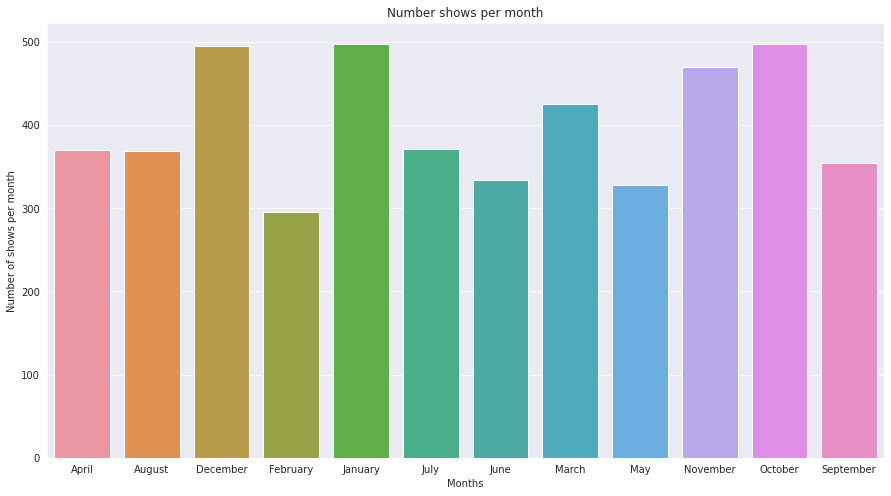

In [16]:
# we plot months as well for a better representation

ax = sns.barplot(data = shows_per_month_gp, x = 'month', y ='n_shows')
ax = ax.set(xlabel='Months', ylabel='Number of shows per month', title='Number shows per month')
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.show(fig)

### Question 8 : **Present the amount of content per genre.**

Στο ερώτημα αυτό κάνουμε split ως προς το column 'listed_in' για να πάρουμε
σε κάθε row ένα μόνο genre.Στην συνέχεια κάνουμε group τα αποτελέσματα
ως προς το column του 'category' που φτιάξαμε και μετράμε το πλήθος εμφάνισης του κάθε genre.
Ταξινομούμε τα αποτελέσματα σε φθίνουσα σειρά και παίρνουμε τις 20 κατηγορίες που εμφανίζονται περισσότερο.



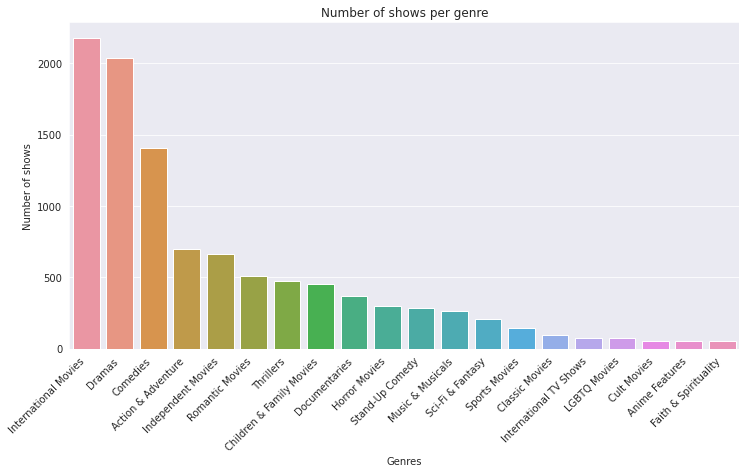

In [17]:
# we split the new_df based on "listed_in" column and create a new dataframe
df = split_to_listed_in(new_df)
shows_per_cat = pd.DataFrame()
shows_per_cat['category'] = df['listed_in'].values
shows_per_cat['n_shows'] = df['show_id'].values

# we group by each genre and count the numbers each genre appears either in a movie or in tv show
# we take the top 20 genres we find
s = shows_per_cat.groupby(['category']).count().sort_values(by='n_shows' ,ascending=False).head(20)
shows_per_cat_gp = pd.DataFrame(s)
shows_per_cat_gp = shows_per_cat_gp.reset_index()

# plot the results
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax = sns.barplot(data = shows_per_cat_gp, x = 'category', y ='n_shows')
ax = ax.set(xlabel='Genres', ylabel='Number of shows', title='Number of shows per genre')
plt.show()

### Question 9 : ***Present the most known directors per country***

Στο ερώτημα αυτό κάνουμε split το dataframe με βάση τόσο τις χώρες όσο και τους director. Για κάθε χώρα λοιπόν μετράμε τις φορές που εμφανίζεται ένας director και ταξινομούμε το αποτέλεσμα σε φθίνουσα σειρά.
Κάνουμε τέλος την γραφική αναπαράσταση των top 3 directors που εμφανίζονται σε κάθε χώρα.

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


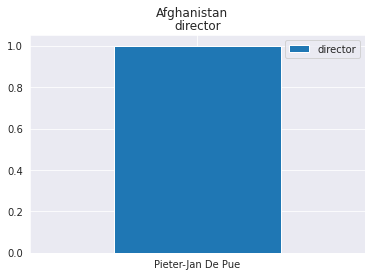

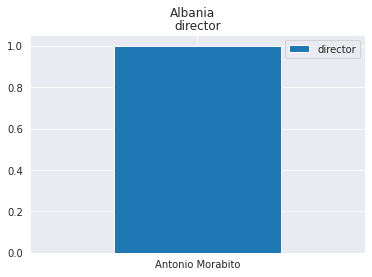

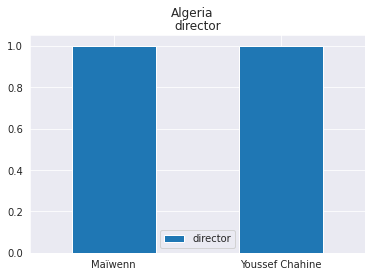

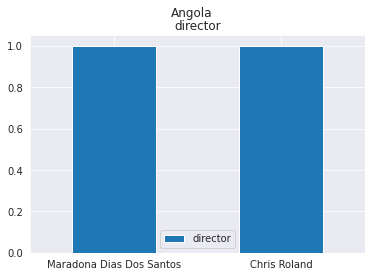

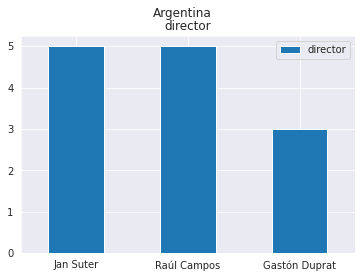

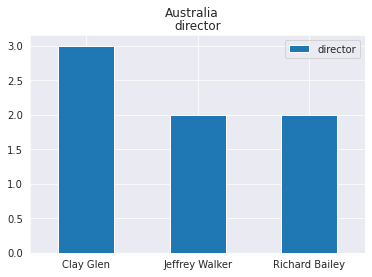

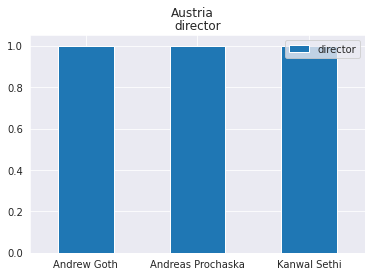

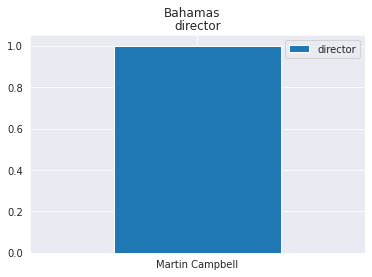

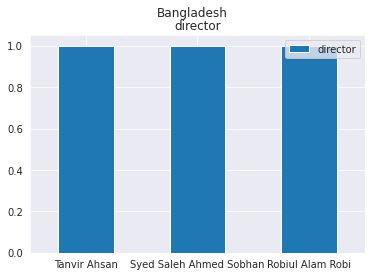

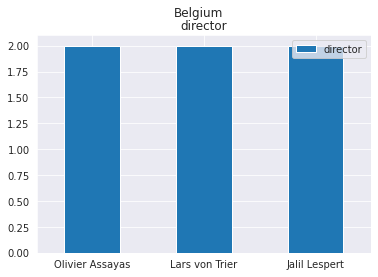

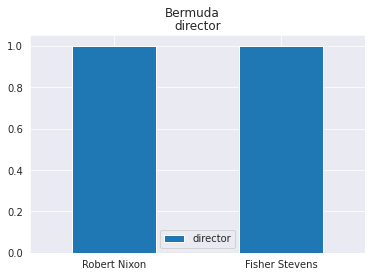

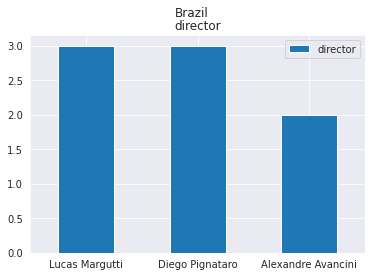

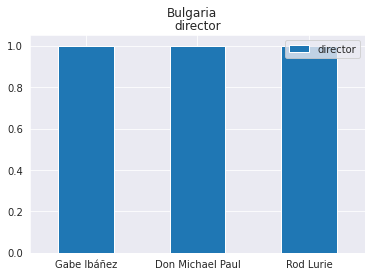

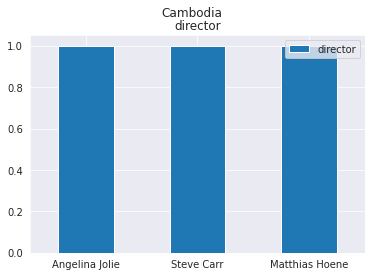

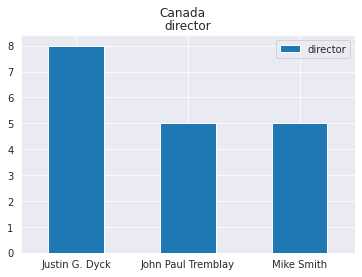

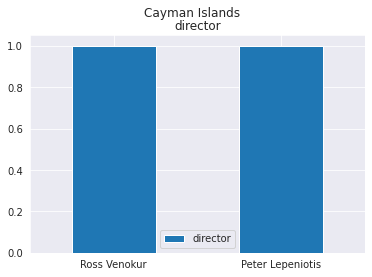

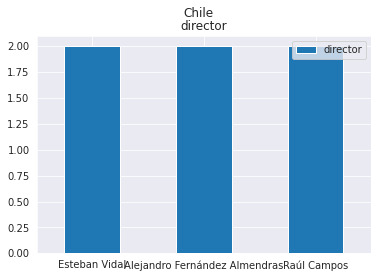

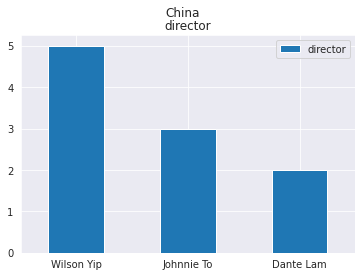

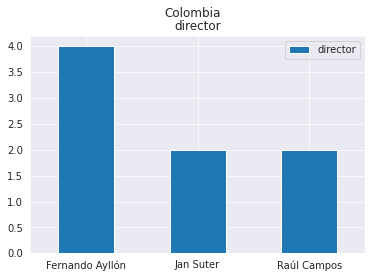

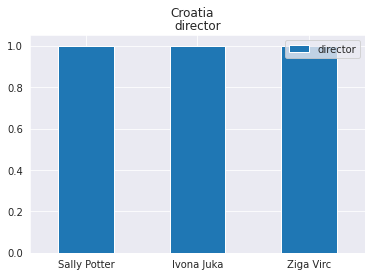

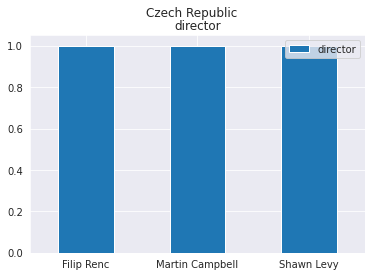

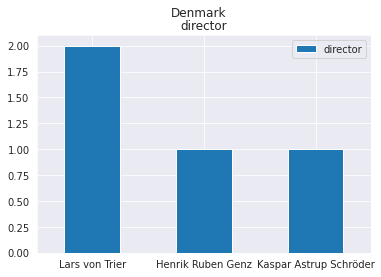

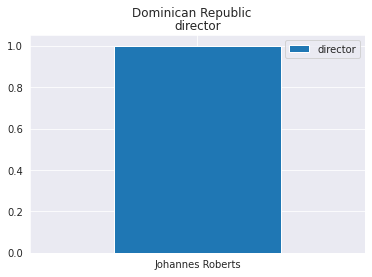

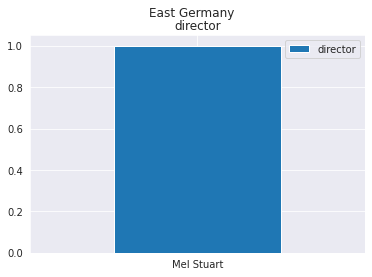

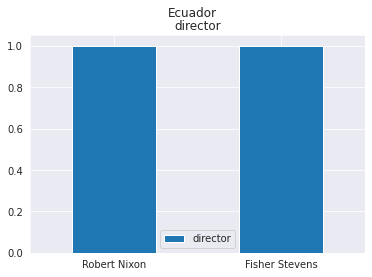

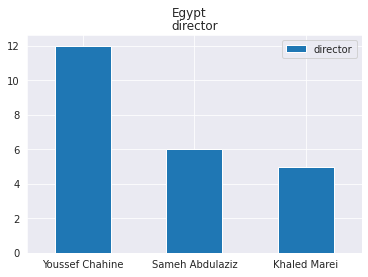

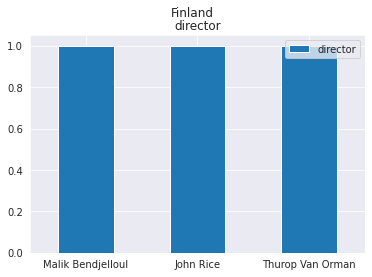

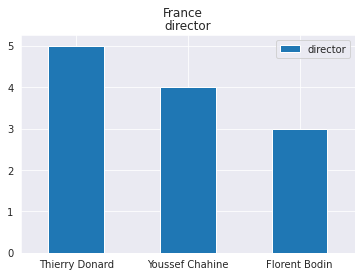

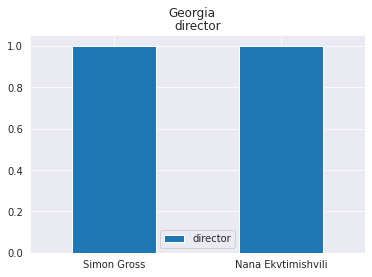

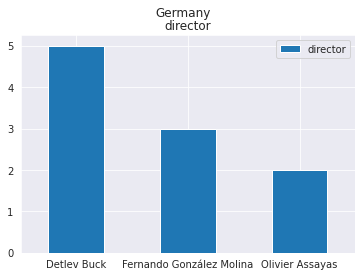

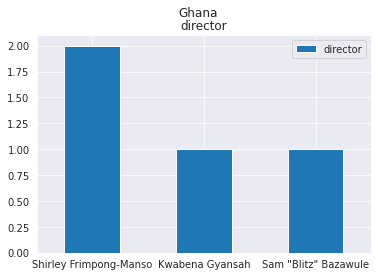

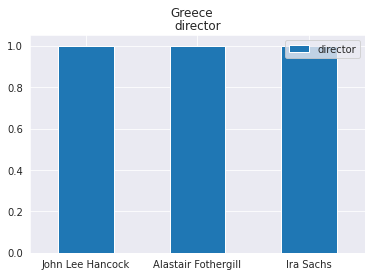

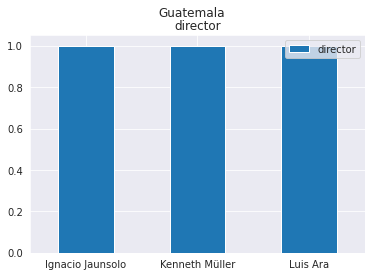

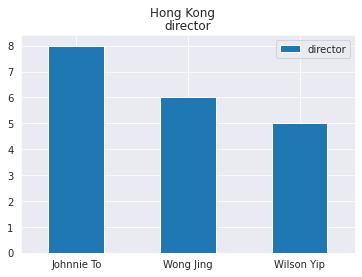

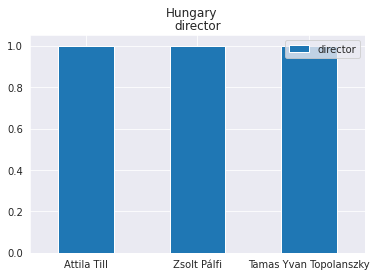

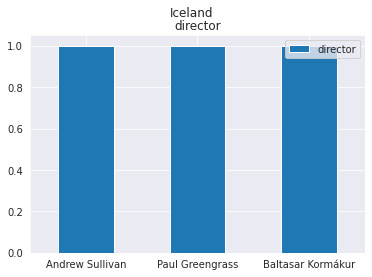

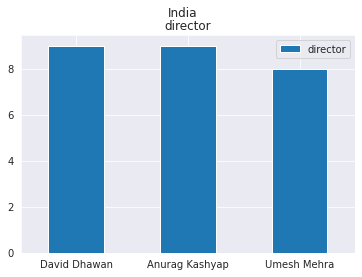

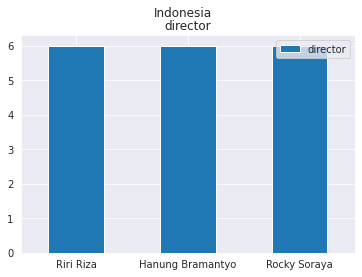

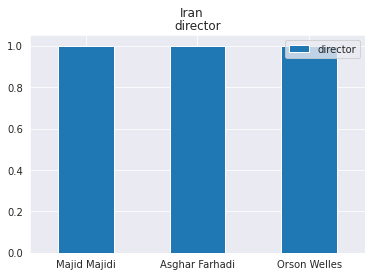

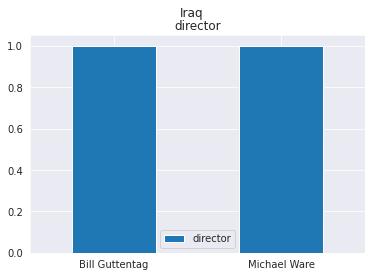

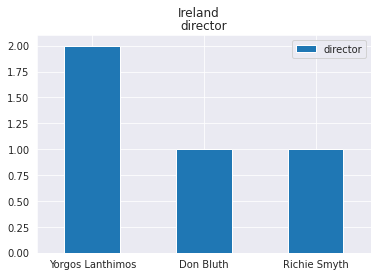

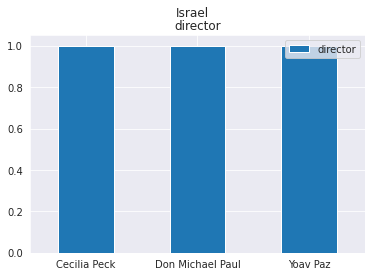

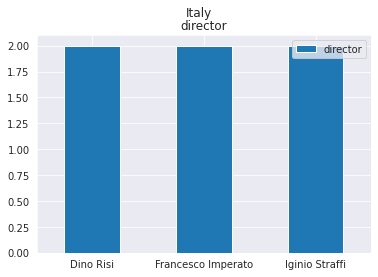

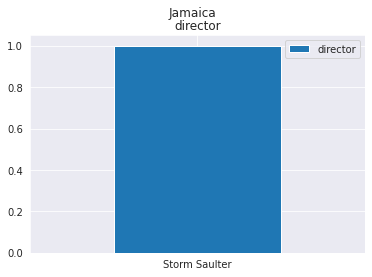

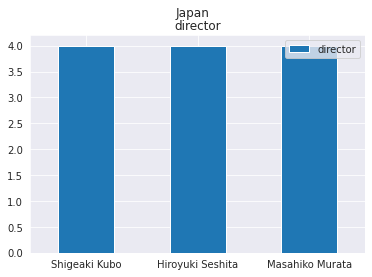

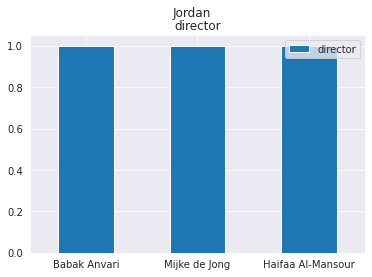

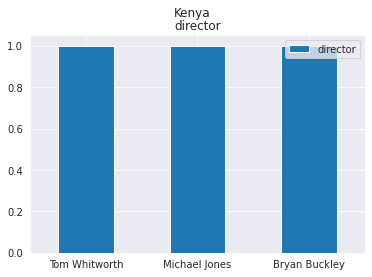

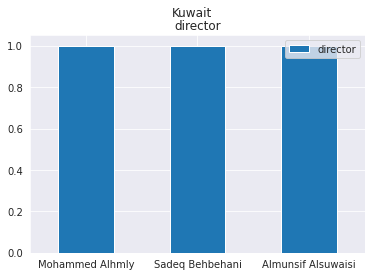

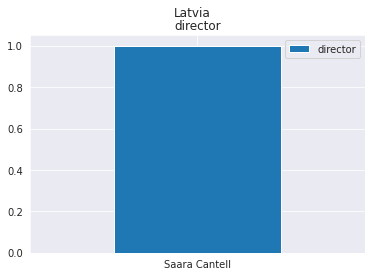

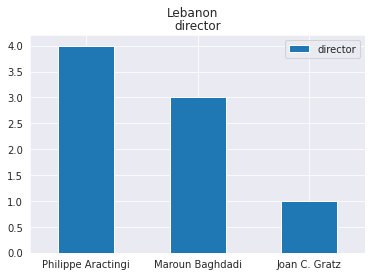

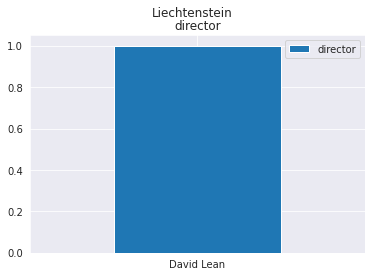

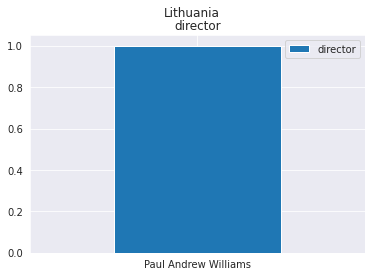

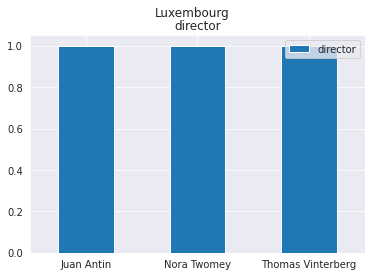

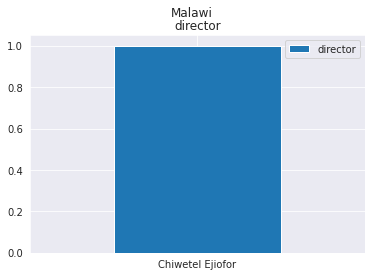

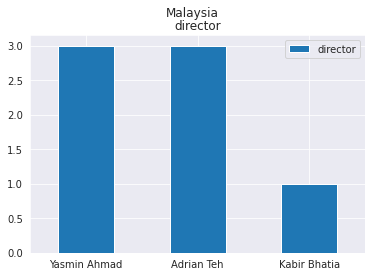

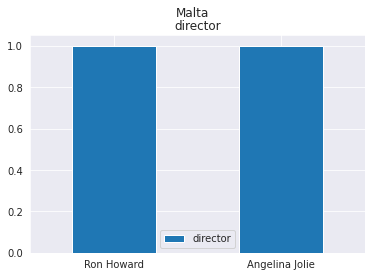

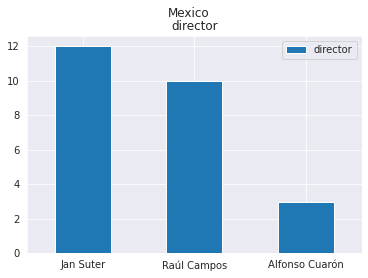

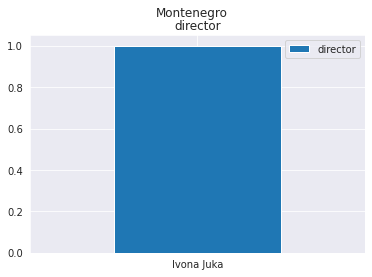

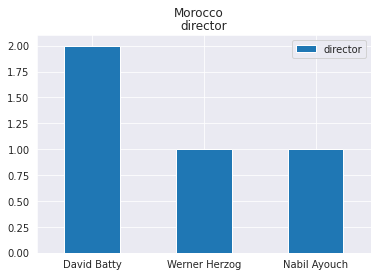

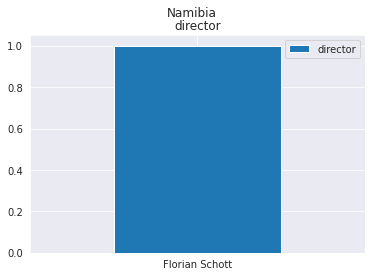

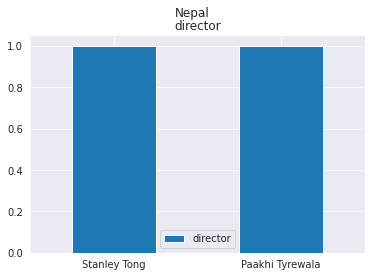

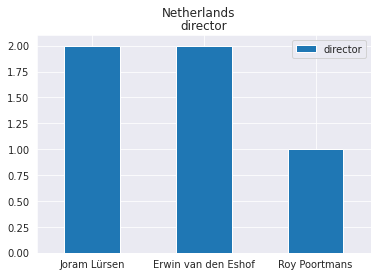

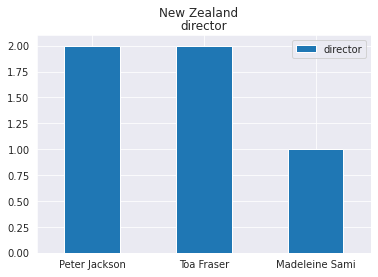

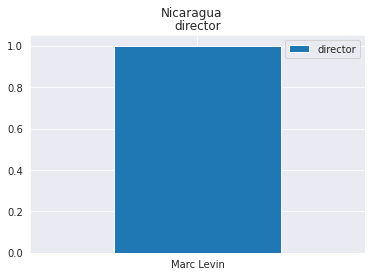

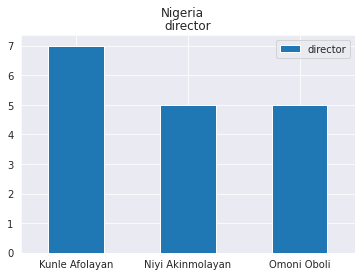

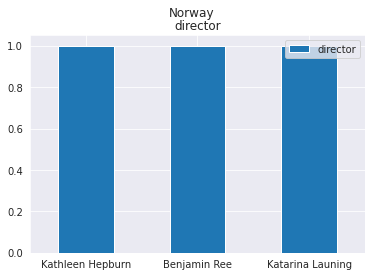

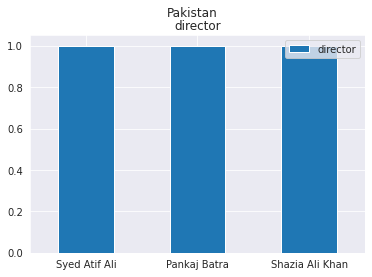

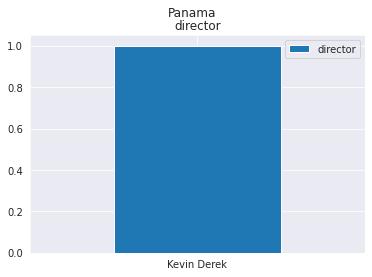

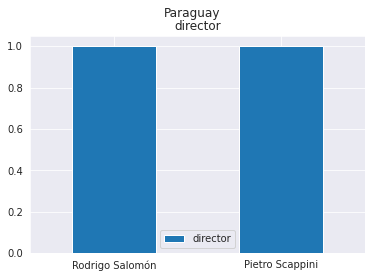

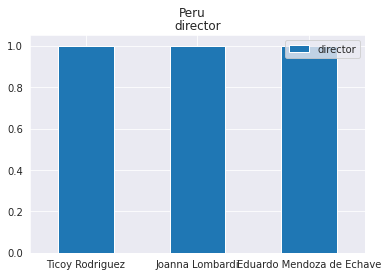

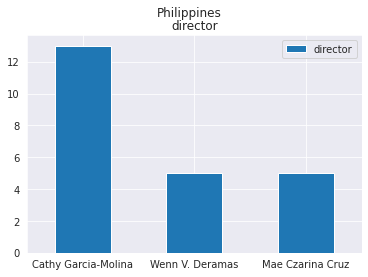

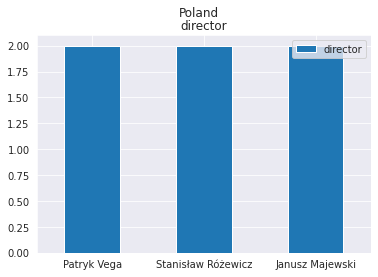

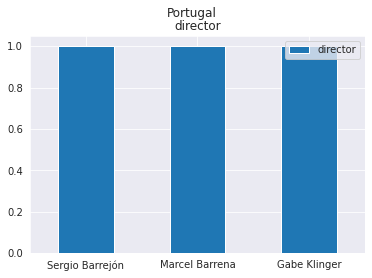

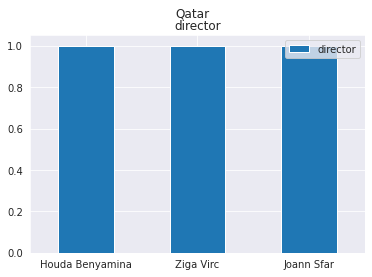

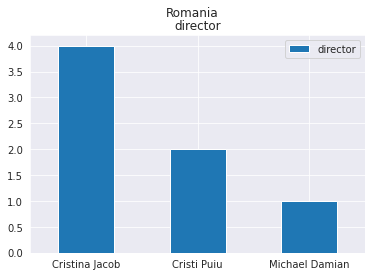

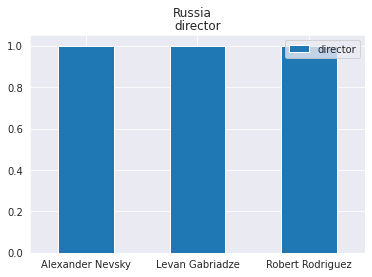

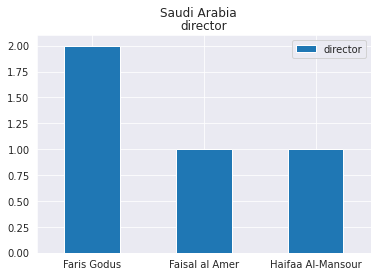

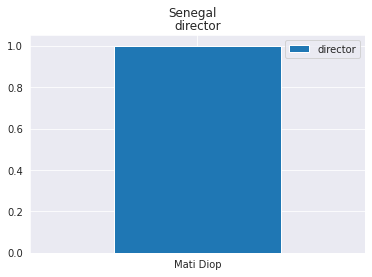

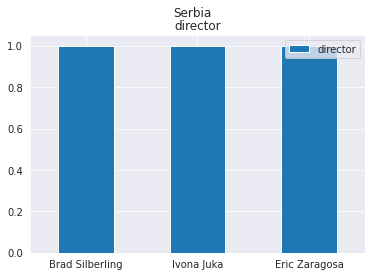

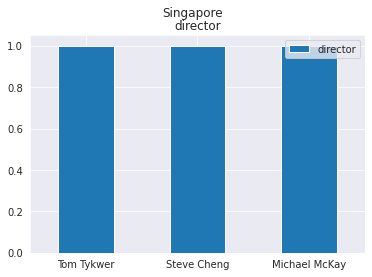

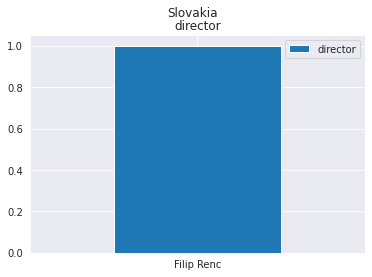

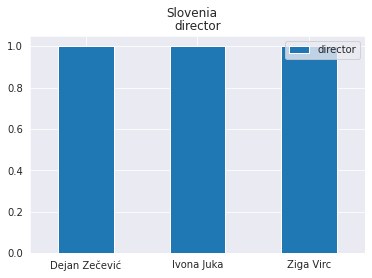

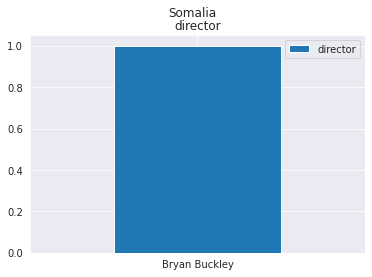

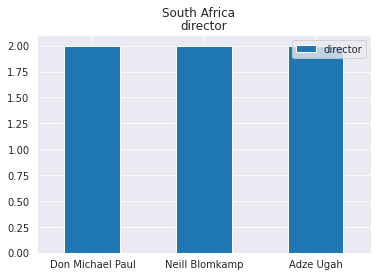

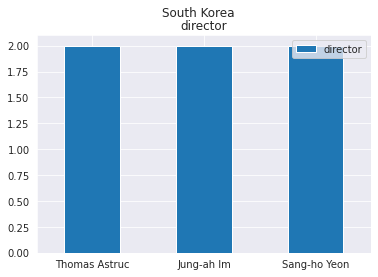

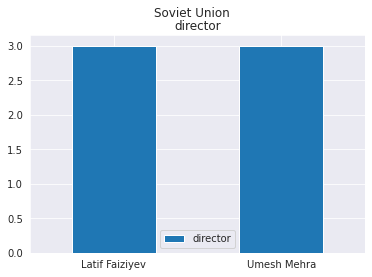

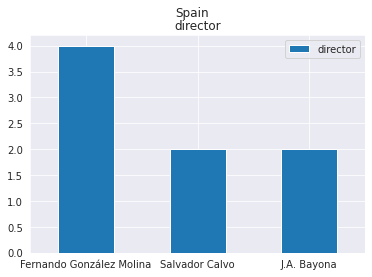

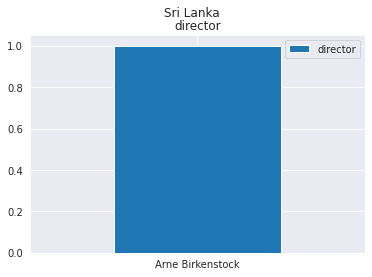

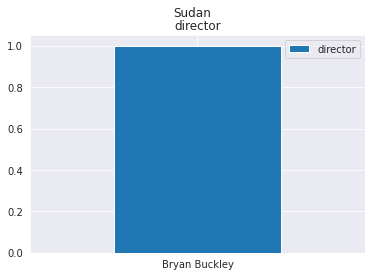

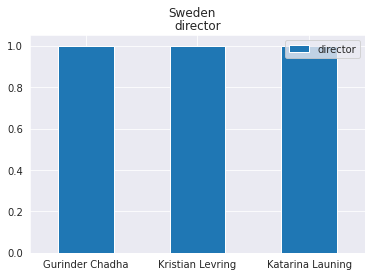

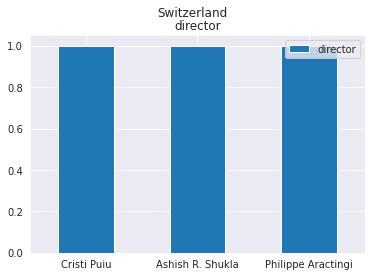

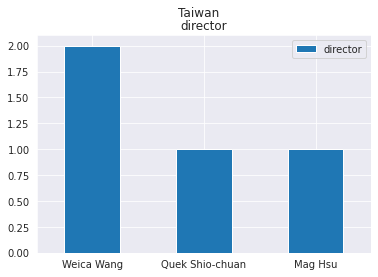

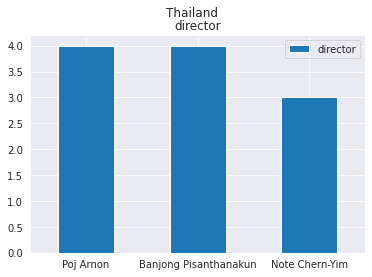

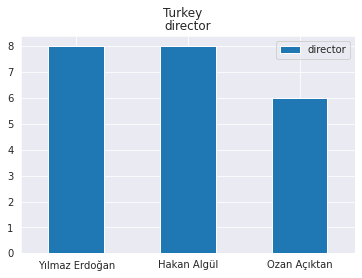

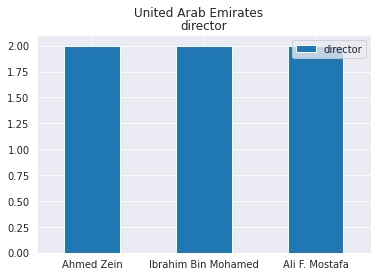

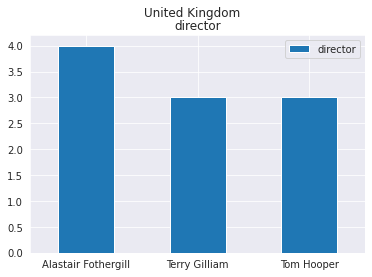

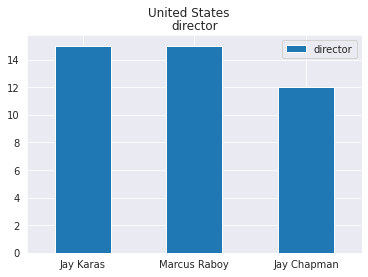

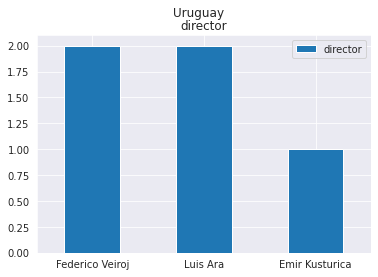

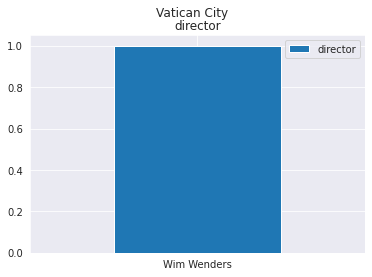

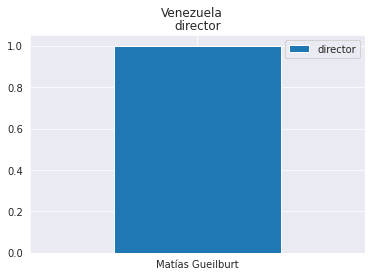

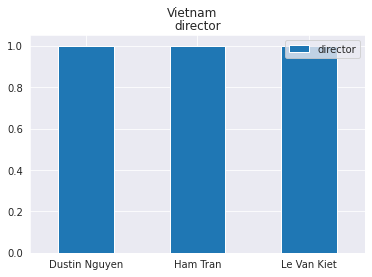

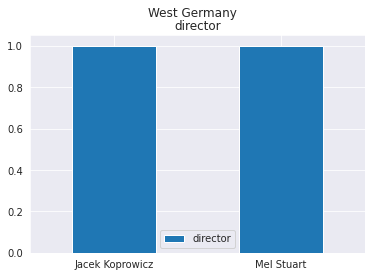

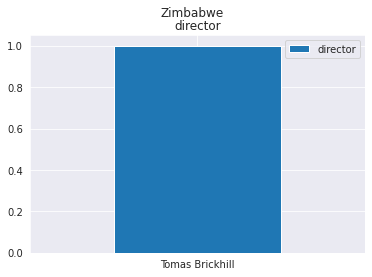

In [18]:
# first we split countries 
split_country_df = split_to_country(new_df)
# now we have to filter only movies and group the cast based on countries 
splitted = split_to_directors(split_country_df)



cropped = pd.DataFrame()
# we make a new df from splitted dataframe and group by country 
cropped['director'] = splitted['director']
cropped['country'] = splitted['country']
cropped = cropped.groupby('country')['director']

# we count the number each actor appears in a country and we print the top 3 for each country
for country,group in cropped:
    
    country_acts = pd.DataFrame(group.value_counts())
  
    top_country_acts = country_acts.head(3)
    
    top_country_acts.plot.bar(rot=0, subplots=True, title=country)

Question 10 :  **Present the TV shows, as grouped by the number of seasons they had** 

Στο ερώτημα αυτό κάνουμε την γραφική αναπαράσταση για το πλήθος των TV show που έχουν συγκεκριμένο αριθμό σεζόν.Kάνουμε replace στο column 'duration' προκειμένου να έχουμε μόνο τον αριθμό των season του κάθε row.
Κάνουμε group λοιπόν ως προς το n_seasons και μετράμε πόσα TV Show έχουν το εκάστοτε n_seasons.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


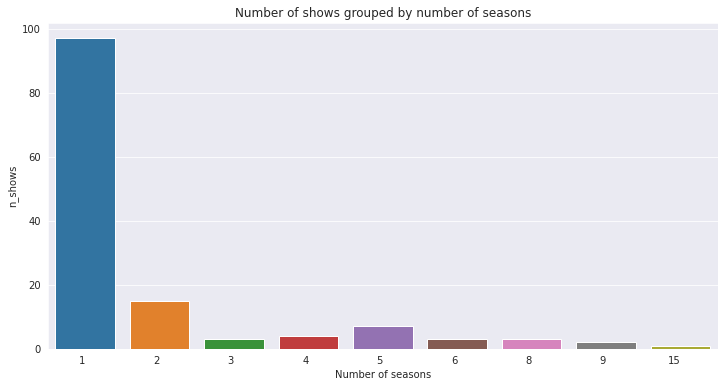

In [19]:
df = pd.DataFrame()
# we select only TV shows
only_tv = new_df.loc[ new_df['type'] == "TV Show" ]
# we replace Duration Column so we only have the number of seasons
only_tv['duration'] = only_tv['duration'].str.replace(" Seasons", "")
only_tv['duration'] = only_tv['duration'].str.replace(" Season", "")

# create a new df with "show_id" and "duration" as replaced above  
df['n_seasons'] = only_tv['duration'].astype(int)
df['n_shows'] = only_tv['show_id']

# we group by number of seasons and count how many times a value appears
df = df.groupby('n_seasons').count()
df = df.reset_index()

# plot the result
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='right')
ax = sns.barplot(data = df, x = 'n_seasons', y ='n_shows')
ax = ax.set(xlabel='Number of seasons', title='Number of shows grouped by number of seasons')
plt.show()

### Question 11 : ***Use more datasets to determine which movies had the highest rating***


Σε αυτό το ερώτημα συνδιάζουμε τα υπόλοιπα αρχεία που μας δόθηκαν με την χρήση dictonaties έτσι ώστε να δημιουργήσουμε ενα dataframe που να περιέχει τις κοινές ταινίες μεταξύ των αρχείων, την ημερομηνία που βγήκε η ταινία αλλά και το imdb rating της.Στην συνέχεια κάνουμε την γραφική αναπαράσταση με τις 10 ταινίες που έχουν το υψηλότερο rating.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


                            title  year rating
tt0108052        Schindler's List  1993    8.9
tt0110912            Pulp Fiction  1994    8.9
tt1375666               Inception  2010    8.8
tt0317248             City of God  2002    8.6
tt0215911                 Koshish  1972    8.6
tt0079221                Gol Maal  1979    8.6
tt10370116  Oththa Seruppu Size 7  2019    8.6
tt0120586      American History X  1998    8.5
tt0400234            Black Friday  2004    8.5
tt1187043                3 Idiots  2009    8.4


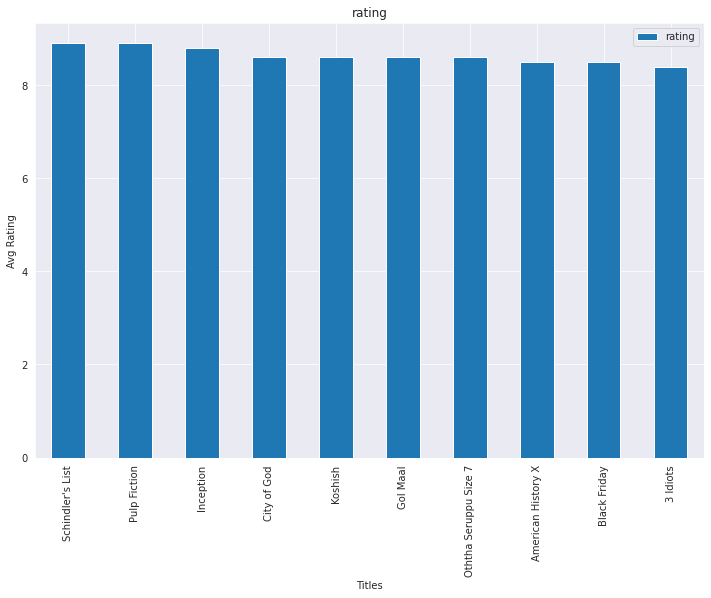

In [20]:
# we read the other files as well
imdb_ratings = pd.read_csv("/content/drive/MyDrive/hw1_data/IMDb ratings.csv")
imdb_movies = pd.read_csv("/content/drive/MyDrive/hw1_data/IMDb movies.csv")

netflix_titles = pd.DataFrame()

# we make a df with title and year column so we can concat it with the other 2 dataframes above
netflix_titles['title'] = new_df['title'].values
netflix_titles['year'] = new_df['release_year'].values

# we set as index to be the title column  
netflix_titles = netflix_titles.set_index(['title'])


# we make a dict with key each title name and release year the year the movie/TV show released
net_dict = new_df.set_index('title')['release_year'].to_dict()

# same for imdb_movies df we make dict with key the imdb_title_id,year and value the title name
imdb_movies_dict = imdb_movies.set_index(['imdb_title_id', 'year'])['title'].to_dict()
# same for imdb_ratings df we make dict with key the imdb_title_id and value the weighted_average_vote
imdb_ratings_dict = imdb_ratings.set_index('imdb_title_id')['weighted_average_vote'].to_dict()


imdb_mov_ratings = dict()

new = dict()  # key: imdb_title_id    value: [title, release_year]
for titleid, year in imdb_movies_dict.keys():
    title = imdb_movies_dict[(titleid, year)]
    if imdb_movies_dict[(titleid, year)] in net_dict.keys() and year == net_dict[title]:
        new[titleid] = [title, year]

# match with imdb_ratings_dict
for titleid in imdb_ratings_dict.keys():
    if titleid in new.keys():
        new[titleid].append(imdb_ratings_dict[titleid])

mydf = pd.DataFrame(new)
mydf = mydf.transpose()
mydf.rename(columns = {0:'title', 1:'year', 2:'rating'}, inplace = True)  # rename columns

top_mov = mydf.sort_values(by='rating', ascending=False).head(10)      # get top 10
print(top_mov)
top_mov.plot.bar(x='title', y='rating', subplots=True, xlabel='Titles', ylabel='Avg Rating')

fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 8)


# Part2 - Recommendation system


## Question 2.1

Δημιουργούμε τις κατάλληλες συναρτήσεις τόσο για το BOW (unigrams-bigrams) όσο και για το TF-IDF (unigrams-bigrams)

In [21]:
# part2 

from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# boolean BoW
# -------------------
# unigrams (1 at a time) ngrams = (1,1)

def count_vectorizer_bigrams(desclist, i):
    vectorizer = CountVectorizer(ngram_range=(1,2), stop_words='english', binary = True, max_features= 30000)  
    x = vectorizer.fit_transform(desclist)

    tokens = vectorizer.get_feature_names()
    bigram = pd.DataFrame(data = x.toarray(), index = i, columns = tokens)
    return bigram, x.toarray()
# ------------------------------------------------------------------------------------------------
def count_vectorizer_unigrams(string, i):
    vectorizer = CountVectorizer(ngram_range=(1,1), stop_words='english', binary = True, max_features = 30000)

    x = vectorizer.fit_transform(string)
    tokens = vectorizer.get_feature_names()

    uni = pd.DataFrame(data = x.toarray(), index = i, columns = tokens)
    return uni,x.toarray()
# ---------------------------------------------------------------------------------------------------

def tfid_bigram(string,i):
  tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word',ngram_range= (1,2), max_features=30000)
  txt_transformed = tf.fit_transform(string)


  df_tfidf = pd.DataFrame(txt_transformed.toarray(), columns=tf.get_feature_names(),index = i)
  return df_tfidf,txt_transformed.toarray()


def tfid_unigram(string,i):
  tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word',ngram_range = (1,1), max_features=30000)
  txt_transformed = tf.fit_transform(string)


  df_tfidf = pd.DataFrame(txt_transformed.toarray(), columns=tf.get_feature_names(),index = i)
  return df_tfidf,txt_transformed.toarray()

# ------------------------------------------------------------------------------------------------


# get only title and description of each movie
to_vector = new_df[new_df['type'] == "Movie"]  
to_vector = to_vector[['title','description']]

titles = to_vector['title'].tolist()
descriptions = to_vector['description'].tolist()


bigram_df, bigram_toarr  = count_vectorizer_bigrams(descriptions, titles)
unigram_df, unigram_toarr = count_vectorizer_unigrams(descriptions, titles)



In [22]:
tfid_uni_df, tfid_uni_toarr = tfid_unigram(descriptions, titles)
tfid_bi_df, tfid_bi_toarr = tfid_bigram(descriptions, titles)

## Question 2.2

Δημιουργούμε ένα dictionary που περιέχει ως key τον τίτλο της κάθε ταινίας και ως value ένα set() με τις λέξεις που απαρτίζεται βάση των dataframes που δημιουργήθηκαν παραπάνω (unigram_df,bigram_df)
Στην συνέχεια εφαρμόζουμε την μέθοδο jaccard και φτιάχνουμε 2 πίνακες n x n 
(όπου n: αριθμός των τίτλων ) έναν για το jaccard similarity του unigram και έναν για το jaccard similarity του bigram.

In [23]:
# we create a dictionary where the key is each movie title from df
# and the value is the token/tokens that appears in the description based on our
# unigram df which is created above
uni_dict = {}
for index in unigram_df.index:
  uni_dict[index] = set()
  for column in unigram_df:
    if unigram_df[column][index] == 1:
      uni_dict[index].add(column)

In [24]:
# same as above for the bigram dataframe
bi_dict = {}
for index in bigram_df.index:
  bi_dict[index] = set()
  for column in bigram_df:
    if bigram_df[column][index] == 1:
      bi_dict[index].add(column)

In [25]:
import numpy as np
from scipy.spatial import distance

# Boolean - UNIGRAM
# jaccard similarity
# we compute and store in a df the similarity between each of the movies we have
# based on jaccard method
titleslist = titles

length = len(titleslist)
similarity_unitest_arr = np.zeros((length, length))
for i in range(0, length):
    for j in range(0, i):
        t1 = titleslist[i]
        t2 = titleslist[j]
        set1 = uni_dict[t1]
        set2 = uni_dict[t2]
        len_inter = len( set1.intersection(set2))
        len_union = len(set1) + len(set2) - len_inter
        similarity_unitest_arr[i][j] = similarity_unitest_arr[j][i] = len_inter/len_union

similarity_unitest_df = pd.DataFrame(data = similarity_unitest_arr,index=titleslist, columns=titleslist)
similarity_unitest_df

,7:19,23:59,9,21,122,187,706,1920,1922,"2,215",3022,Oct-01,22-Jul,15-Aug,​​Kuch Bheege Alfaaz,​Goli Soda 2,​Maj Rati ​​Keteki,​Mayurakshi,#Alive,#AnneFrank - Parallel Stories,#FriendButMarried,#FriendButMarried 2,#realityhigh,#Roxy,#Selfie,#Selfie 69,"¡Ay, mi madre!",Çarsi Pazar,Ég man þig,Çok Filim Hareketler Bunlar,Òlòtūré,Æon Flux,1 Chance 2 Dance,1 Mile to You,10 Days in Sun City,10 jours en or,"10,000 B.C.",100 Meters,100% Halal,1000 Rupee Note,...,You Are My Home,You Can Tutu,You Can’t Fight Christmas,You Carry Me,You Changed My Life,You Don't Mess with the Zohan,You Get Me,You're Everything To Me,You're My Boss,You've Got This,Young Adult,Young Tiger,Your Name Engraved Herein,Your Son,"Yours Sincerely, Kanan Gill","Yours, Mine and Ours",اشتباك,الف مبروك,Yucatán,Yuva,Zach Galifianakis: Live at the Purple Onion,Zack and Miri Make a Porno,Zaki Chan,Zapped,Zed Plus,Zenda,Zero,Zindagi Kitni Haseen Hay,Zindagi Na Milegi Dobara,Zinzana,Zion,Zipi & Zape y la Isla del Capitan,Zoé: Panoramas,Zodiac,Zokkomon,Zombieland,Zoo,Zoom,Zozo,Zubaan
7:19,0.000000,0.000000,0.000000,0.000000,0.0,0.028571,0.0,0.0,0.000000,0.0,0.0,0.0,0.034483,0.000000,0.0,0.0,0.0,0.000000,0.033333,0.035714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.037037,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.034483,0.000000,0.0,0.0,0.037037,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.038462,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.035714,0.000000,0.000000
23:59,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.037037,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.04,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.038462,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.037037,0.0,0.000000,0.0,0.000000,0.038462,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.037037,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.037037,0.0,0.000000,0.000000,0.037037,0.000000,0.0,0.00,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.038462,0.038462,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.037037,0.000000,0.000000,0.000000,0.038462
21,0.000000,0.000000,0.037037,0.000000,0.0,0.029412,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.035714,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
122,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.041667,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.040000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.043478,0.0,0.047619,0.043478,0.000000,0.000000,0.0,0.00,0.0,0.000000,...,0.111111,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.038462,0.000000,0.0,0.000000,0.045455,0.0,0.0,0.000000,0.043478,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.04,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [26]:


# Boolean - BIGRAM
titleslist = titles

length = len(titleslist)
similarity_bitest_arr = np.zeros((length, length))
for i in range(0, length):
    for j in range(0, i):
        t1 = titleslist[i]
        t2 = titleslist[j]
        set1 = bi_dict[t1]
        set2 = bi_dict[t2]
        len_inter = len( set1.intersection(set2))
        len_union = len(set1) + len(set2) - len_inter
        similarity_bitest_arr[i][j] = similarity_bitest_arr[j][i] = len_inter/len_union
        
similarity_bitest_df = pd.DataFrame(data = similarity_bitest_arr,index=titleslist, columns=titleslist)
similarity_bitest_df

,7:19,23:59,9,21,122,187,706,1920,1922,"2,215",3022,Oct-01,22-Jul,15-Aug,​​Kuch Bheege Alfaaz,​Goli Soda 2,​Maj Rati ​​Keteki,​Mayurakshi,#Alive,#AnneFrank - Parallel Stories,#FriendButMarried,#FriendButMarried 2,#realityhigh,#Roxy,#Selfie,#Selfie 69,"¡Ay, mi madre!",Çarsi Pazar,Ég man þig,Çok Filim Hareketler Bunlar,Òlòtūré,Æon Flux,1 Chance 2 Dance,1 Mile to You,10 Days in Sun City,10 jours en or,"10,000 B.C.",100 Meters,100% Halal,1000 Rupee Note,...,You Are My Home,You Can Tutu,You Can’t Fight Christmas,You Carry Me,You Changed My Life,You Don't Mess with the Zohan,You Get Me,You're Everything To Me,You're My Boss,You've Got This,Young Adult,Young Tiger,Your Name Engraved Herein,Your Son,"Yours Sincerely, Kanan Gill","Yours, Mine and Ours",اشتباك,الف مبروك,Yucatán,Yuva,Zach Galifianakis: Live at the Purple Onion,Zack and Miri Make a Porno,Zaki Chan,Zapped,Zed Plus,Zenda,Zero,Zindagi Kitni Haseen Hay,Zindagi Na Milegi Dobara,Zinzana,Zion,Zipi & Zape y la Isla del Capitan,Zoé: Panoramas,Zodiac,Zokkomon,Zombieland,Zoo,Zoom,Zozo,Zubaan
7:19,0.000000,0.000000,0.000000,0.000000,0.0,0.017857,0.0,0.0,0.000000,0.0,0.0,0.0,0.022222,0.000000,0.0,0.0,0.0,0.00000,0.023256,0.02381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.023810,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.025641,0.000000,0.0,0.0,0.027778,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.024390,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.022727,0.000000,0.000000
23:59,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.025000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.027027,0.0,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.027778,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.025641,0.0,0.000000,0.0,0.000000,0.027027,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.028571,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.027778,0.0,0.000000,0.000000,0.026316,0.000000,0.0,0.000000,0.0,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.028571,0.034483,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.027778,0.000000,0.000000,0.000000,0.027027
21,0.000000,0.000000,0.028571,0.000000,0.0,0.019608,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.027778,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
122,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.034483,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.032258,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.032258,0.0,0.034483,0.034483,0.000000,0.000000,0.0,0.000000,0.0,0.00000,...,0.083333,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.029412,0.000000,0.0,0.000000,0.033333,0.0,0.0,0.000000,0.033333,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.03125,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

Όμοια με το jaccard similarity δημιουργούμε και πάλι 2 πίνακες έναν για bigrams έναν για unigrams αλλά εφαρμόζουμε το cosine similarity method.

In [27]:

# TF-ID UNIGRAM
# cosine similarity
# we compute and store in a df the similarity between each of the movies
# based on the cosine similarity method

from numpy import dot
from numpy.linalg import norm
titleslist = titles

length = len(titleslist)
similarity_unitest_arr = np.zeros((length, length))
for i in range(0, length):
    for j in range(0, i):
      values1 = tfid_uni_toarr[i]
      values2 = tfid_uni_toarr[j]
      similarity_unitest_arr[i][j] = similarity_unitest_arr[j][i] = dot(values1,values2)/(norm(values1)*norm(values2))
similarity_unitest_tfid_df = pd.DataFrame(data = similarity_unitest_arr,index=titleslist, columns=titleslist)
similarity_unitest_tfid_df

,7:19,23:59,9,21,122,187,706,1920,1922,"2,215",3022,Oct-01,22-Jul,15-Aug,​​Kuch Bheege Alfaaz,​Goli Soda 2,​Maj Rati ​​Keteki,​Mayurakshi,#Alive,#AnneFrank - Parallel Stories,#FriendButMarried,#FriendButMarried 2,#realityhigh,#Roxy,#Selfie,#Selfie 69,"¡Ay, mi madre!",Çarsi Pazar,Ég man þig,Çok Filim Hareketler Bunlar,Òlòtūré,Æon Flux,1 Chance 2 Dance,1 Mile to You,10 Days in Sun City,10 jours en or,"10,000 B.C.",100 Meters,100% Halal,1000 Rupee Note,...,You Are My Home,You Can Tutu,You Can’t Fight Christmas,You Carry Me,You Changed My Life,You Don't Mess with the Zohan,You Get Me,You're Everything To Me,You're My Boss,You've Got This,Young Adult,Young Tiger,Your Name Engraved Herein,Your Son,"Yours Sincerely, Kanan Gill","Yours, Mine and Ours",اشتباك,الف مبروك,Yucatán,Yuva,Zach Galifianakis: Live at the Purple Onion,Zack and Miri Make a Porno,Zaki Chan,Zapped,Zed Plus,Zenda,Zero,Zindagi Kitni Haseen Hay,Zindagi Na Milegi Dobara,Zinzana,Zion,Zipi & Zape y la Isla del Capitan,Zoé: Panoramas,Zodiac,Zokkomon,Zombieland,Zoo,Zoom,Zozo,Zubaan
7:19,0.000000,0.006421,0.016737,0.011752,0.027450,0.066248,0.004423,0.012939,0.010037,0.000000,0.000000,0.021925,0.075417,0.032838,0.013710,0.005976,0.006051,0.012385,0.045305,0.070959,0.010664,0.021769,0.008135,0.000000,0.006630,0.020627,0.006291,0.021084,0.006587,0.003923,0.011138,0.014090,0.004710,0.018978,0.018026,0.010124,0.022780,0.000000,0.018133,0.016796,...,0.038116,0.011744,0.018128,0.017432,0.000000,0.011638,0.098798,0.004306,0.005937,0.030626,0.026469,0.016864,0.000000,0.013435,0.024631,0.026918,0.010777,0.004083,0.093834,0.016711,0.003869,0.005792,0.023179,0.029889,0.000000,0.004687,0.015541,0.010619,0.000000,0.010049,0.000000,0.006446,0.004300,0.004460,0.032840,0.010556,0.011951,0.029102,0.013990,0.029855
23:59,0.006421,0.000000,0.003033,0.000000,0.043941,0.009330,0.015256,0.064661,0.020789,0.005414,0.031487,0.003205,0.000000,0.003186,0.000000,0.023029,0.024048,0.021587,0.008627,0.010785,0.015322,0.014620,0.014030,0.017494,0.028837,0.000000,0.021457,0.022874,0.071920,0.010658,0.016805,0.020272,0.032956,0.030360,0.022157,0.056899,0.018193,0.089992,0.016383,0.002926,...,0.000000,0.029131,0.008853,0.003159,0.067730,0.019977,0.026661,0.035214,0.008839,0.024393,0.032991,0.008567,0.000000,0.025930,0.016515,0.016566,0.022354,0.028214,0.005958,0.036855,0.005273,0.022320,0.040867,0.086168,0.032325,0.000000,0.012197,0.027124,0.025927,0.003134,0.013843,0.068853,0.000000,0.000000,0.033065,0.012053,0.063174,0.016515,0.022755,0.019174
9,0.016737,0.003033,0.000000,0.044245,0.031887,0.015536,0.003065,0.009261,0.005654,0.008169,0.014068,0.016794,0.012041,0.023091,0.003259,0.002823,0.005804,0.029122,0.030699,0.017298,0.057727,0.016674,0.014000,0.010169,0.003131,0.010832,0.046162,0.010841,0.003111,0.010784,0.034616,0.010001,0.000000,0.006718,0.057557,0.013915,0.039318,0.008977,0.009628,0.002602,...,0.030575,0.014031,0.014296,0.013658,0.053111,0.005497,0.049003,0.023666,0.011382,0.035092,0.018643,0.021527,0.024383,0.006387,0.013254,0.022036,0.012897,0.002829,0.015530,0.011573,0.005362,0.022293,0.036901,0.005306,0.002877,0.016131,0.000000,0.002945,0.034599,0.005661,0.008251,0.003044,0.002979,0.009171,0.005829,0.032808,0.014303,0.013253,0.011149,0.068001
21,0.011752,0.000000,0.044245,0.000000,0.000000,0.052979,0.015226,0.036434,0.014259,0.000000,0.005529,0.014597,0.002962,0.014513,0.003181,0.000000,0.002876,0.007212,0.016976,0.010286,0.033498,0.014493,0.028004,0.016393,0.007721,0.014574,0.024411,0.013774,0.000000,0.013504,0.012715,0.015089,0.020832,0.028000,0.015850,0.031427,0.036512,0.026793,0.022209,0.000000,...,0.019694,0.000000,0.009752,0.000000,0.006861,0.036782,0.007903,0.021961,0.000000,0.000000,0.007842,0.011412,0.000000,0.006234,0.000000,0.044436,0.002653,0.014054,0.000000,0.012334,0.064092,0.002753,0.034121,0.002629,0.002808,0.019303,0.014832,0.012122,0.000000,0.014277,0.000000,0.007507,0.014803,0.012338,0.002888,0.031566,0.002942,0.025249,0.029382,0.016144
122,0.027450,0.043941,0.031887,0.000

In [28]:

# TF-ID BIGRAM
titleslist = titles

length = len(titleslist)
similarity_bitest_arr = np.zeros((length, length))
for i in range(0, length):
    for j in range(0, i):
      values1 = tfid_bi_toarr[i]
      values2 = tfid_bi_toarr[j]
      similarity_bitest_arr[i][j] = similarity_bitest_arr[j][i] = dot(values1,values2)/(norm(values1)*norm(values2))
similarity_bitest_tfid_df = pd.DataFrame(data = similarity_bitest_arr,index=titleslist, columns=titleslist)
similarity_bitest_tfid_df

,7:19,23:59,9,21,122,187,706,1920,1922,"2,215",3022,Oct-01,22-Jul,15-Aug,​​Kuch Bheege Alfaaz,​Goli Soda 2,​Maj Rati ​​Keteki,​Mayurakshi,#Alive,#AnneFrank - Parallel Stories,#FriendButMarried,#FriendButMarried 2,#realityhigh,#Roxy,#Selfie,#Selfie 69,"¡Ay, mi madre!",Çarsi Pazar,Ég man þig,Çok Filim Hareketler Bunlar,Òlòtūré,Æon Flux,1 Chance 2 Dance,1 Mile to You,10 Days in Sun City,10 jours en or,"10,000 B.C.",100 Meters,100% Halal,1000 Rupee Note,...,You Are My Home,You Can Tutu,You Can’t Fight Christmas,You Carry Me,You Changed My Life,You Don't Mess with the Zohan,You Get Me,You're Everything To Me,You're My Boss,You've Got This,Young Adult,Young Tiger,Your Name Engraved Herein,Your Son,"Yours Sincerely, Kanan Gill","Yours, Mine and Ours",اشتباك,الف مبروك,Yucatán,Yuva,Zach Galifianakis: Live at the Purple Onion,Zack and Miri Make a Porno,Zaki Chan,Zapped,Zed Plus,Zenda,Zero,Zindagi Kitni Haseen Hay,Zindagi Na Milegi Dobara,Zinzana,Zion,Zipi & Zape y la Isla del Capitan,Zoé: Panoramas,Zodiac,Zokkomon,Zombieland,Zoo,Zoom,Zozo,Zubaan
7:19,0.000000,0.002922,0.008661,0.007106,0.013333,0.034271,0.001891,0.005870,0.004695,0.000000,0.000000,0.011741,0.080655,0.015298,0.007481,0.003035,0.002992,0.006173,0.022981,0.041281,0.004251,0.010905,0.004442,0.000000,0.003173,0.009528,0.002858,0.009170,0.003173,0.002310,0.004983,0.008217,0.001988,0.008754,0.007957,0.004196,0.011018,0.000000,0.008200,0.008896,...,0.015921,0.005528,0.012504,0.008520,0.000000,0.006782,0.044481,0.002159,0.003362,0.029802,0.012129,0.008561,0.000000,0.006376,0.013509,0.010909,0.006682,0.002012,0.051579,0.007488,0.002022,0.002790,0.010767,0.013423,0.000000,0.002177,0.006909,0.004716,0.000000,0.005164,0.000000,0.002839,0.002003,0.002060,0.015236,0.005216,0.005406,0.013920,0.006762,0.012966
23:59,0.002922,0.000000,0.001530,0.000000,0.020811,0.004707,0.006361,0.028603,0.009483,0.004124,0.017315,0.001673,0.000000,0.001447,0.000000,0.011404,0.011597,0.010493,0.004267,0.006118,0.005955,0.007141,0.007470,0.008437,0.013455,0.000000,0.009504,0.009700,0.033781,0.006118,0.007332,0.011527,0.032366,0.013655,0.009537,0.022996,0.008580,0.043478,0.007224,0.001511,...,0.000000,0.013371,0.005954,0.001505,0.033055,0.011351,0.011705,0.037634,0.004880,0.011426,0.014741,0.004241,0.000000,0.011999,0.008832,0.006546,0.013515,0.013555,0.003194,0.016103,0.002687,0.010482,0.018511,0.037734,0.017931,0.000000,0.005287,0.011747,0.010606,0.001570,0.006519,0.029573,0.000000,0.000000,0.014958,0.005807,0.027863,0.007703,0.010726,0.008120
9,0.008661,0.001530,0.000000,0.029667,0.017175,0.008912,0.001453,0.004659,0.002933,0.007076,0.008797,0.009972,0.006349,0.011929,0.001972,0.001590,0.003183,0.016097,0.017268,0.011159,0.025516,0.009262,0.008476,0.005577,0.001662,0.005549,0.023250,0.005228,0.001662,0.007040,0.017175,0.006467,0.000000,0.003436,0.028174,0.006395,0.021087,0.004932,0.004828,0.001528,...,0.014162,0.007324,0.010934,0.007402,0.029477,0.003552,0.024465,0.013156,0.007147,0.018694,0.009473,0.012118,0.015668,0.003361,0.008060,0.009903,0.008868,0.001545,0.009466,0.005750,0.003107,0.011906,0.019008,0.002642,0.001815,0.008307,0.000000,0.001451,0.016095,0.003226,0.004419,0.001487,0.001539,0.004697,0.002999,0.017975,0.007174,0.007030,0.005976,0.032747
21,0.007106,0.000000,0.029667,0.000000,0.000000,0.035513,0.008437,0.021417,0.008644,0.000000,0.004040,0.010129,0.001825,0.008761,0.002249,0.000000,0.001843,0.004658,0.011159,0.007754,0.035612,0.009407,0.019813,0.010506,0.004788,0.008723,0.014368,0.007763,0.000000,0.010302,0.007372,0.011402,0.011394,0.033529,0.009066,0.016879,0.022883,0.017202,0.013014,0.000000,...,0.010659,0.000000,0.030364,0.000000,0.004450,0.027774,0.004610,0.014266,0.000000,0.000000,0.004657,0.007507,0.000000,0.003834,0.000000,0.023335,0.002131,0.008973,0.000000,0.007162,0.043407,0.001718,0.020538,0.001530,0.002070,0.011616,0.008543,0.006976,0.000000,0.009507,0.000000,0.004285,0.008934,0.007384,0.001736,0.020210,0.001724,0.015650,0.018404,0.009085
122,0.013333,0.020811,0.017175,0.000

## Question 2.3

Στο ερώτημα αυτό υλοποιούμε την συνάρτηση που ζητείται στην εκφώνηση με την χρήση των προηγούμενων data frame που δημιουργήσαμε.
Και στις 2 περιπτώσεις boolean / tf-idf τυπώνουμε τις Ν πιο όμοιες ταινίες τόσο για τα unigrams όσο και για τα bigrams.
Παρακάτω δίνουμε κάποια ενδεικτικά αποτελέσματα και τα γραφήματα αυτών.

In [29]:

def filter_dict(mydict):
  for key,val in mydict.items():
    if val == 0:
       del mydict[key]
  return mydict


def get_similar_movies1(title, N=10, method='boolean'):

  if method == "boolean":
    # boolean bigram
    
    bi = similarity_bitest_df[title].sort_values(ascending = False).head(N).to_dict()
    uni = similarity_unitest_df[title].sort_values(ascending = False).head(N).to_dict()
    bi = filter_dict(bi)
    uni = filter_dict(uni)
    print("UNIGRAM BOOLEAN:")  
    uni_df = pd.DataFrame(uni.items(), index=uni.keys())
    #uni_df.plot.bar()
    #plt.show()
    fig = sns.barplot(data = uni_df.reset_index(), x = 0, y = 1)
    fig.set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    plt.show(fig)

    print("BIGRAM BOOLEAN:")
    bi_df = pd.DataFrame(bi.items(), index=bi.keys())
    #bi_df.plot.bar()
    #plt.show()
    ax = sns.barplot(data = bi_df.reset_index(), x = 0, y = 1)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax = plt.gcf()
    ax.set_size_inches(12, 8)
    plt.show(ax)

  elif method == 'tf-idf':
    bi = similarity_bitest_tfid_df[title].sort_values(ascending = False).head(N).to_dict()
    uni = similarity_unitest_tfid_df[title].sort_values(ascending = False).head(N).to_dict()
    bi = filter_dict(bi)
    uni = filter_dict(uni)
    print("UNIGRAM TF-IDF:")  
    uni_df = pd.DataFrame(uni.items(), index=uni.keys())
    fig = sns.barplot(data = uni_df.reset_index(), x = 0, y = 1)
    fig.set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    plt.show(fig)
    print("BIGRAM TF-IDF:")
    bi_df = pd.DataFrame(bi.items(), index=bi.keys())
    ax = sns.barplot(data = bi_df.reset_index(), x = 0, y = 1)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax = plt.gcf()
    ax.set_size_inches(12, 8)
    plt.show(ax)

UNIGRAM BOOLEAN:


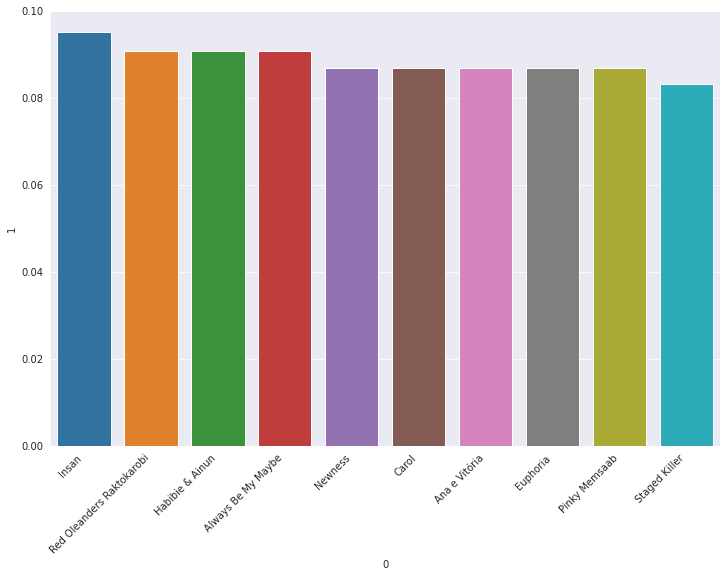

BIGRAM BOOLEAN:


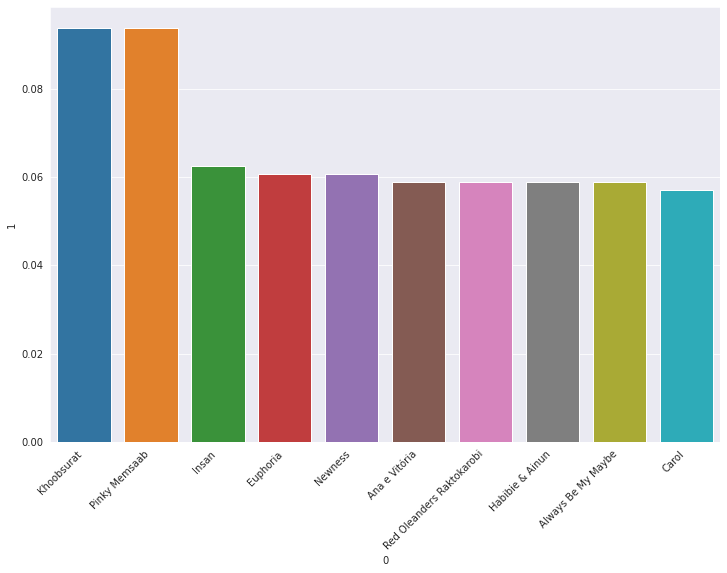

In [30]:
get_similar_movies1('A Beautiful Life', 10, 'boolean')

UNIGRAM TF-IDF:


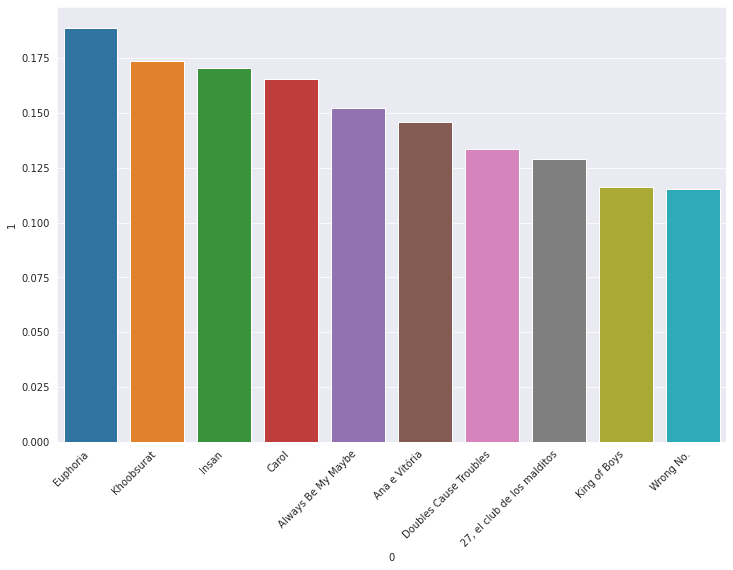

BIGRAM TF-IDF:


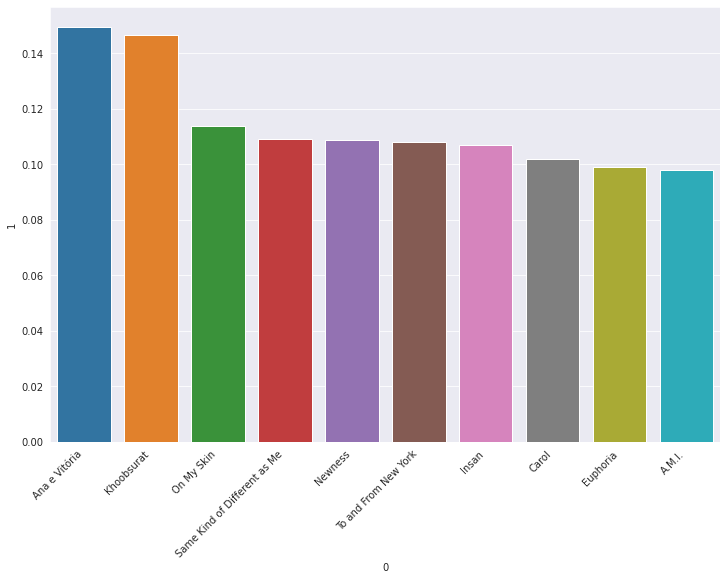

In [31]:
get_similar_movies1('A Beautiful Life', 10, 'tf-idf')

Δεδομένου οτι η TF-IDF μέθοδος έχει μεγαλύτερη ακρίβεια (αφού όχι μόνο υπολογίζει τη συχνότητα  μιας λέξης στο description που βρίσκεται, άλλα τη συσχετίζει με όλα τα descriptions), παρατηρούμε στο γράφημα Unigram-TFIDF οτι πρώτο στα προτεινόμενα είναι η ταινία Euphoria, ενώ στο Unigram-CountVectorizer η ταινία Euphoria βρίσκεται στην 8η θέση στα προτεινόμενα.
Εξετάζοντας τα αποτελέσματα από τα Bigrams TF-IDF και CountVectorizer , παρατηρούμε οτι υπάρχουν περισσότερες κοινές ταινίες στα αποτελέσματα σε σχέση με τα αποτελέσματα Unigrams TF-IDF και CountVectorizer, κάτι που ήταν αναμενόμενο

## Question 2.4

In [32]:
from scipy.spatial import distance

def get_similar_movies2(new_str, N, method):
  new_desc_list = [new_str] + descriptions
  new_titles_list = ['users_input'] + titles
  if method == 'boolean':
    print("BOOLEAN: \n")

    unigram_df, unigram_arr = count_vectorizer_unigrams(new_desc_list, new_titles_list)
    bigram_df, bigram_arr = count_vectorizer_bigrams(new_desc_list,new_titles_list)

    similarity_unitest_arr = np.zeros(len(new_titles_list))
    similarity_bitest_arr = np.zeros(len(new_titles_list))

    input_vector = unigram_arr[0]
    input_vector2 = bigram_arr[0]
    
    for i in range(1, len(new_titles_list)):
      similarity_unitest_arr[i] = 1 - distance.jaccard( input_vector, unigram_arr[i] )
      similarity_bitest_arr[i] = 1 - distance.jaccard( input_vector2, bigram_arr[i]  )
    
    similarity_unitest_df = pd.DataFrame(data = similarity_unitest_arr,index=new_titles_list).sort_values(by=0, ascending=False).head(N)
    similarity_bitest_df  = pd.DataFrame(data = similarity_bitest_arr,index=new_titles_list).sort_values(by=0, ascending=False).head(N)
    print("UNIGRAM BOOLEAN:")
    #similarity_unitest_df.sort_values(by=0, ascending=False).head(N).plot.bar()
    #plt.show()
    fig1 = sns.barplot(data =similarity_unitest_df.reset_index(), x = 0, y = 'index')
    fig1 = plt.gcf()
    fig1.set_size_inches(12, 8)
    plt.show(fig1)
    print("BIGRAM BOOLEAN:")
    fig = sns.barplot(data = similarity_bitest_df.reset_index(), x = 0, y = 'index')
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    plt.show(fig)
    #similarity_bitest_df.sort_values(by=0, ascending=False).head(N).plot.bar()
    #plt.show()
  elif method == 'tf-idf':
    print("TF-IDF: \n")
    unigram_df, unigram_arr = tfid_unigram(new_desc_list, new_titles_list)
    bigram_df, bigram_arr   = tfid_bigram(new_desc_list,new_titles_list)

    similarity_unitest_arr = np.zeros(len(new_titles_list))
    similarity_bitest_arr = np.zeros(len(new_titles_list))

    input_vector = unigram_arr[0]
    input_vector2 = bigram_arr[0]
    
    for i in range(1, len(new_titles_list)):
      similarity_unitest_arr[i] = 1 - distance.cosine( input_vector, unigram_arr[i] )
      similarity_bitest_arr[i] = 1 - distance.cosine( input_vector2, bigram_arr[i]  )
    
    similarity_unitest_df = pd.DataFrame(data = similarity_unitest_arr,index=new_titles_list).sort_values(by=0, ascending=False).head(N)
    similarity_bitest_df  = pd.DataFrame(data = similarity_bitest_arr,index=new_titles_list).sort_values(by=0, ascending=False).head(N)


    print("UNIGRAM TF-IDF:")
    fig1 = sns.barplot(data =similarity_unitest_df.reset_index(), x = 0, y = 'index')
    fig1 = plt.gcf()
    fig1.set_size_inches(12, 8)
    plt.show(fig1)

    print("BIGRAM TF-IDF:")
    ax = sns.barplot(data = similarity_bitest_df.reset_index(), x = 0, y = 'index')
    ax = plt.gcf()
    ax.set_size_inches(12, 8)
    plt.show(ax)



BOOLEAN: 

UNIGRAM BOOLEAN:


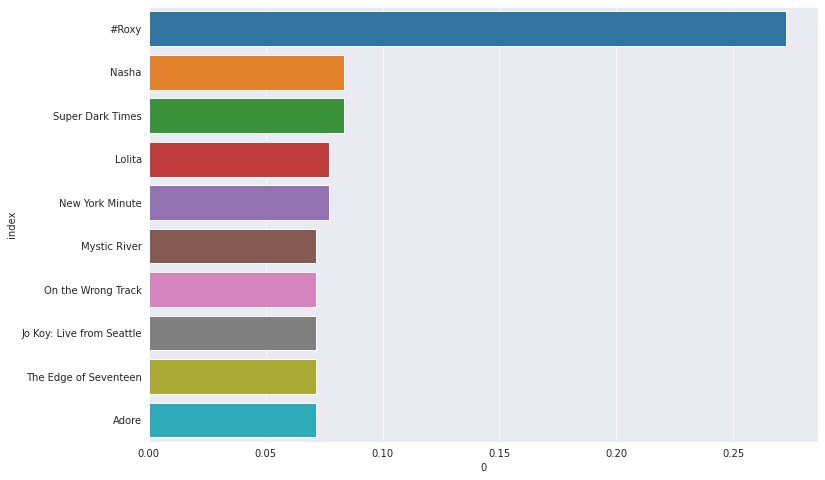

BIGRAM BOOLEAN:


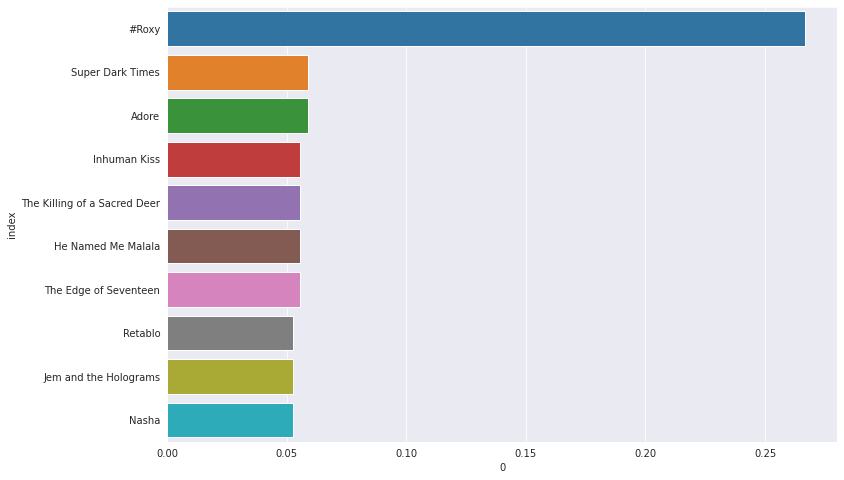

In [33]:
get_similar_movies2('teenage hacker with nose', 10, 'boolean')

TF-IDF: 

UNIGRAM TF-IDF:


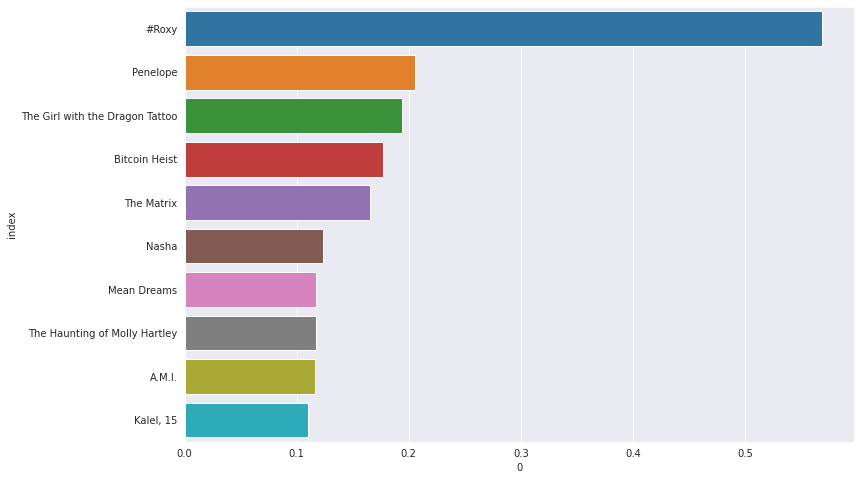

BIGRAM TF-IDF:


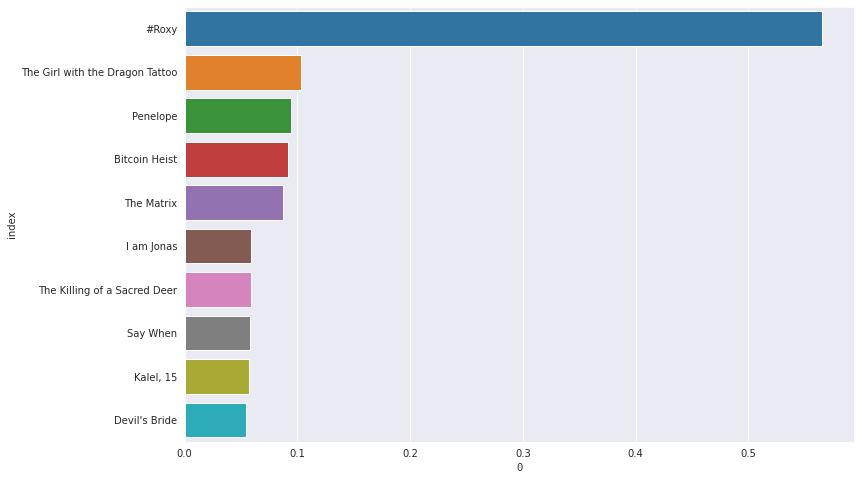

In [34]:
get_similar_movies2('teenage hacker with nose', 10, 'tf-idf')